# DATA EXPLORATION AND MINING (IFN509)  Assignment 2.
## Project: Data Mining - Mining COVID-19 Related Information

**Team Name: Assess2 Group 8** |
**Xu Han (Rymin), Xing Ming, Tong Xu**

---

## Project (a)
## Association mining to find hotspots based on a Patient Route Data
### Prerequisite
1. Import the neccesity of libraries before experimentation.
2. Data Exploration 

In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from apyori import apriori
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('datasets/D1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  1509 non-null   int64  
 1   global_num  959 non-null    float64
 2   date        1509 non-null   object 
 3   location    1509 non-null   object 
 4   latitude    1509 non-null   float64
 5   longitude   1509 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 70.9+ KB


In [4]:
df.head(10)

,patient_id,global_num,date,location,latitude,longitude
0,1000000001,2.0,22/01/2020,Gyeonggi-do_Gimpo-si,37.615246,126.715632
1,1000000001,2.0,24/01/2020,Seoul_Jung-gu,37.567241,127.005659
2,1000000002,5.0,26/01/2020,Seoul_Seongdong-gu,37.563992,127.029534
3,1000000002,5.0,27/01/2020,Seoul_Dongdaemun-gu,37.566262,127.065815
4,1000000002,5.0,28/01/2020,Seoul_Gangnam-gu,37.523674,127.046543
5,1000000004,7.0,30/01/2020,Seoul_Jungnang-gu,37.612772,127.098167
6,1000000005,9.0,31/01/2020,Seoul_Jungnang-gu,37.612772,127.098167
7,1000000006,10.0,30/01/2020,Gyeonggi-do_Goyang-si,37.641141,126.791968
8,1000000007,11.0,30/01/2020,Gyeonggi-do_Goyang-si,37.641141,126.791968
9,1000000008,13.0,31/01/2020,Seoul_Jung-gu,37.567241,127.005659


In [15]:
df.describe(include='all')

,patient_id,global_num,date,location,latitude,longitude
count,1.509000e+03,959.000000,1509,1509,1509.000000,1509.000000
unique,NaN,NaN,95,151,NaN,NaN
top,NaN,NaN,22/02/2020,Incheon_Jung-gu,NaN,NaN
freq,NaN,NaN,65,133,NaN,NaN
mean,2.198445e+09,6589.135558,NaN,NaN,36.811513,127.516431
std,1.945771e+09,3823.396412,NaN,NaN,0.959171,0.922021
min,1.000000e+09,2.000000,NaN,NaN,33.499621,126.421333
25%,1.000000e+09,2471.000000,NaN,NaN,35.871435,126.902080
50%,1.100000e+09,8178.000000,NaN,NaN,37.460191,127.046543
75%,3.009000e+09,9752.000000,NaN,NaN,37.526372,128.588890


### 1.What variables did you include in the analysis? Justify your choice. 
To identify the data problem, we applied Human Inspection (HI) and automatic validation by Pandas (AVP) methods. As a result, we decided to drop `global_num`,`longitude` and `latitude` variables, in order to make the dataset more suitable for association mining.

In [16]:
df = df.drop(['global_num', 'latitude', 'longitude'], axis=1)
df['patient_id']=df['patient_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  1509 non-null   object
 1   date        1509 non-null   object
 2   location    1509 non-null   object
dtypes: object(3)
memory usage: 35.5+ KB


### 2. Does this dataset require any pre-processing before building the association mining model?
We need to change the data type of `patient_id` from int64 to string.

### 3. Conduct association mining and answer the following: 
#### a. What is the ‘min_support’ threshold set and discuss why it is chosen? 

min_sup = 0.001 & min_con = 0.1

It is encouraged to experiment by adjusting the parameters individually, based on the steps mentioned in the report.

In [17]:
def getTransTable(df, min_sup, min_con):
    df = df.sort_values(by = ['date'], ascending = False)
    trans = df.groupby(['patient_id'])['location'].apply(list)
    trans_list = list(trans)
    results = list(apriori(trans_list, min_support=min_sup, min_confidence=min_con))

    rules = []    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            rules.append([','.join(rule.items_base), 
                          ','.join(rule.items_add),
                          rule_set.support, 
                          rule.confidence, 
                          rule.lift]) 

            result_df = pd.DataFrame(rules, columns=['Left_side', 'Right_side', 
                                                         'Support','Confidence', 'Lift']) 
    return result_df

In [18]:
trans = getTransTable(df, 0.005, 0.1)
print(trans.head(10))
print(trans.describe())

                       Left_side                     Right_side   Support  \
0                                               Incheon_Jung-gu  0.149270   
1              Busan_Busanjin-gu                Busan_Yeonje-gu  0.006734   
2                Busan_Yeonje-gu              Busan_Busanjin-gu  0.006734   
3                  Busan_Dong-gu                Busan_Yeonje-gu  0.007856   
4                Busan_Yeonje-gu                  Busan_Dong-gu  0.007856   
5               Busan_Dongnae-gu                Busan_Yeonje-gu  0.005612   
6                   Daegu_Buk-gu                  Daegu_Jung-gu  0.011223   
7                  Daegu_Jung-gu                   Daegu_Buk-gu  0.011223   
8   Gyeongsangnam-do_Changwon-si  Gyeongsangnam-do_Uiryeong-gun  0.005612   
9  Gyeongsangnam-do_Uiryeong-gun   Gyeongsangnam-do_Changwon-si  0.005612   

   Confidence       Lift  
0    0.149270   1.000000  
1    0.545455   9.529412  
2    0.117647   9.529412  
3    0.700000  12.229412  
4    0.137255  12

#### B. Report the top 5 frequently occurring rules and interpret them.

In [19]:
trans = getTransTable(df, 0.005, 0.1)
trans = trans.sort_values(by='Lift', ascending=False)
trans.head(5)

,Left_side,Right_side,Support,Confidence,Lift
8,Gyeongsangnam-do_Changwon-si,Gyeongsangnam-do_Uiryeong-gun,0.005612,0.384615,26.360947
9,Gyeongsangnam-do_Uiryeong-gun,Gyeongsangnam-do_Changwon-si,0.005612,0.384615,26.360947
4,Busan_Yeonje-gu,Busan_Dong-gu,0.007856,0.137255,12.229412
3,Busan_Dong-gu,Busan_Yeonje-gu,0.007856,0.700000,12.229412
2,Busan_Yeonje-gu,Busan_Busanjin-gu,0.006734,0.117647,9.529412


### 4. Identify at least 10 common routes that positive patients from the Seoul province in the Dongjak-gu city have travelled. 

In [20]:
tmp_trans = getTransTable(df, 0.001, 0)#(min_support,min_confident)
route_Dongjak=tmp_trans.loc[(tmp_trans["Left_side"] == "Seoul_Dongjak-gu") & \
                            (tmp_trans["Lift"] > 1)].sort_values(by='Lift', ascending=False)
route_Dongjak.head(10)

,Left_side,Right_side,Support,Confidence,Lift
3885,Seoul_Dongjak-gu,"Seoul_Gangnam-gu,Gyeonggi-do_Seongnam-si",0.001122,0.012658,11.278481
3374,Seoul_Dongjak-gu,"Daegu_Nam-gu,Seoul_Gangnam-gu",0.001122,0.012658,11.278481
5444,Seoul_Dongjak-gu,"Seoul_Yongsan-gu,Daegu_Jung-gu,Daegu_Dong-gu",0.001122,0.012658,11.278481
5429,Seoul_Dongjak-gu,"Seoul_Jung-gu,Daegu_Jung-gu,Daegu_Dong-gu",0.001122,0.012658,11.278481
5353,Seoul_Dongjak-gu,"Seoul_Yongsan-gu,Daegu_Dalseo-gu,Seoul_Yangche...",0.001122,0.012658,11.278481
5324,Seoul_Dongjak-gu,"Seoul_Yongsan-gu,Daegu_Dalseo-gu,Daegu_Dong-gu",0.001122,0.012658,11.278481
5309,Seoul_Dongjak-gu,"Daegu_Dalseo-gu,Seoul_Yangcheon-gu,Daegu_Dong-gu",0.001122,0.012658,11.278481
5294,Seoul_Dongjak-gu,"Gyeongsangbuk-do_Chilgok-gun,Seoul_Jung-gu,Dae...",0.001122,0.012658,11.278481
5279,Seoul_Dongjak-gu,"Daegu_Seo-gu,Seoul_Jung-gu,Daegu_Buk-gu",0.002245,0.025316,11.278481
5250,Seoul_Dongjak-gu,"Daegu_Seo-gu,Gyeongsangbuk-do_Chilgok-gun,Daeg...",0.001122,0.012658,11.278481


### 5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalize why? 

In [21]:
from collections import defaultdict
import subprocess
import re

def seq_min(df, min_sup, min_conf):
    ''' The code is cited from Week 6 Tuturial in IFN509 Data Exploration and Mining '''
    df = df.sort_values(['patient_id','date'], ascending = True)
    trans = df.groupby(['patient_id'])['location'].apply(list)
    sequences = trans.values.tolist()

    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict   = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 
                     'seq_rule_input.txt', 'seq_rule_output.txt', 
                     supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

sequence_rules = seq_min(df, 0.005, 0.1)
sequence_rules = sequence_rules.sort_values(by='Support', ascending=False)
sequence_rules.head(10)

,Left_rule,Right_rule,Support,Confidence
259,[Incheon_Jung-gu],[Seoul_Gangnam-gu],0.026936,0.180451
317,[Incheon_Jung-gu],[Seoul_Jungnang-gu],0.016835,0.112782
597,[Daegu_Jung-gu],[Daegu_Buk-gu],0.010101,0.183673
324,[Seoul_Songpa-gu],[Seoul_Jungnang-gu],0.007856,0.291667
966,[Busan_Dong-gu],[Busan_Yeonje-gu],0.007856,0.700000
974,[Busan_Busanjin-gu],[Busan_Yeonje-gu],0.006734,0.545455
986,[Busan_Dongnae-gu],[Busan_Yeonje-gu],0.005612,0.294118
381,[Seoul_Mapo-gu],[Seoul_Yangcheon-gu],0.005612,0.277778
870,[Gyeongsangbuk-do_Pohang-si],[Daegu_Buk-gu],0.004489,0.285714
956,[Busan_Haeundae-gu],[Busan_Yeonje-gu],0.004489,0.285714


---
## Project (b): Clustering Mobility Data
### Prerequisite
**Import the neccesity of libraries before experimentation.**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 1. Data Exploration and Pre-process
#### Identify the data quality problems in this dataset such as unusual data types, missing values, etc, and explain how to fix them?
1. unary attribute: `date`
    We will delete this attribute.
2. redundant values: in `region`, there is a value "total" appeares in every `country`. However, there are still some other specific regions in some `country`s. In another words, most of `country`s have aggregated information "total" and information for their "state"s. Thus, we will drop the rows with "total" for the `country` with its specific 'state"s. 
3. missing values: `retail` `grocery_and_pharmacy` `parks` `transit_stations` and `residential`.
    We will impute the missing value with the reletive mean value.
4. outliers: `grocery_and_pharmacy` `parks` and `transit_stations`, we won't fix them, as the outliers are not very far away.

In [12]:
df=pd.read_csv('datasets/D2.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 9 columns):
country                 1130 non-null object
region                  1130 non-null object
date                    1130 non-null object
retail                  939 non-null float64
grocery_and_pharmacy    942 non-null float64
parks                   884 non-null float64
transit_stations        939 non-null float64
workplaces              1130 non-null int64
residential             881 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 79.5+ KB


In [14]:
print(df.apply(lambda x: sum(x.isnull())/len(x),axis=0))

country                 0.000000
region                  0.000000
date                    0.000000
retail                  0.169027
grocery_and_pharmacy    0.166372
parks                   0.217699
transit_stations        0.169027
workplaces              0.000000
residential             0.220354
dtype: float64


In [15]:
df.describe(include='all')

,country,region,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
count,1130,1130,1130,939.000000,942.000000,884.000000,939.000000,1130.000000,881.000000
unique,125,1005,1,NaN,NaN,NaN,NaN,NaN,NaN
top,United Kingdom,Total,16/04/2020,NaN,NaN,NaN,NaN,NaN,NaN
freq,152,125,1130,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-55.725240,-23.630573,-25.774887,-56.657082,-47.941593,21.153235
std,NaN,NaN,NaN,20.561601,17.761839,39.704546,17.446708,17.066850,8.053113
min,NaN,NaN,NaN,-96.000000,-75.000000,-96.000000,-91.000000,-85.000000,-2.000000
25%,NaN,NaN,NaN,-72.000000,-34.000000,-57.000000,-70.000000,-62.000000,15.000000
50%,NaN,NaN,NaN,-59.000000,-24.000000,-28.000000,-57.000000,-49.000000,20.000000
75%,NaN,NaN,NaN,-41.000000,-12.000000,-2.000000,-45.000000,-37.250000,27.000000



---- Show the Histogram and Boxplot for retail ----


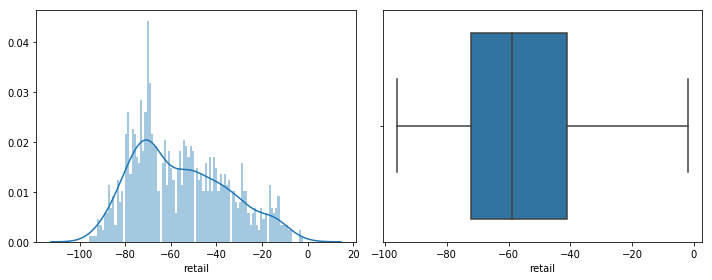


---- Show the Histogram and Boxplot for grocery_and_pharmacy ----


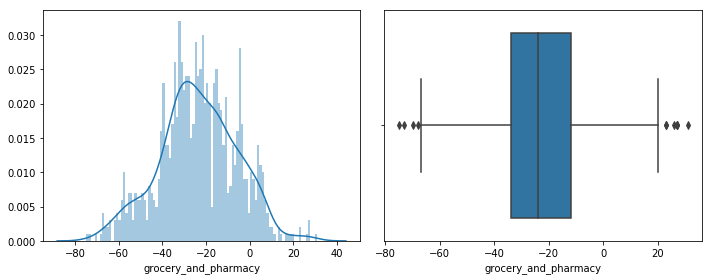


---- Show the Histogram and Boxplot for parks ----


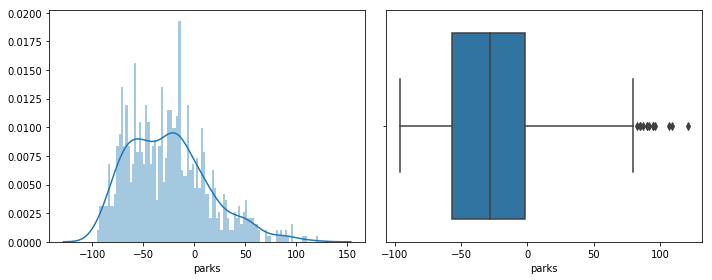


---- Show the Histogram and Boxplot for transit_stations ----


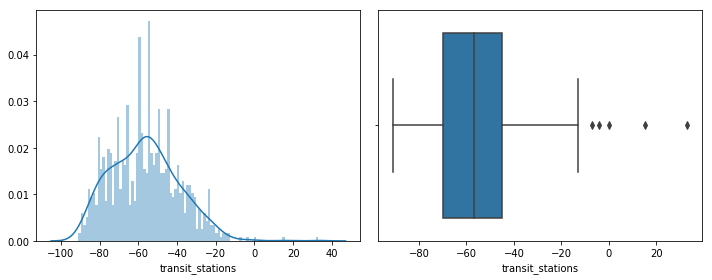


---- Show the Histogram and Boxplot for workplaces ----


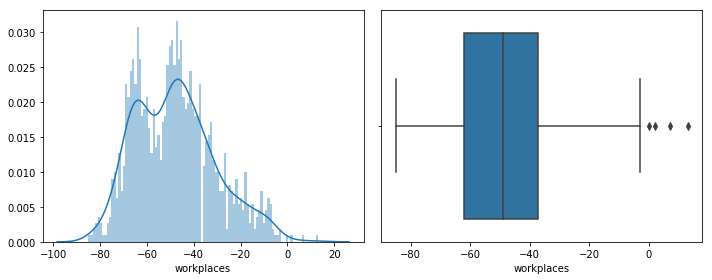


---- Show the Histogram and Boxplot for residential ----


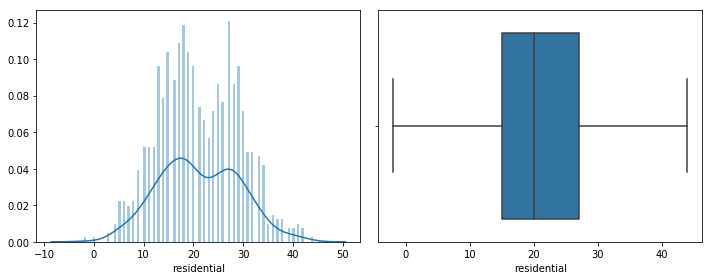

In [16]:
#outlier and distribution issues
cols = ['retail', 'grocery_and_pharmacy', 'parks','transit_stations','workplaces','residential']
for col in cols:
    fig, ax = plt.subplots(ncols=2,figsize=(10,4))
    ax[0]=sns.distplot(df[col].dropna(),ax=ax[0], bins=100)
    ax[1]=sns.boxplot(df[col])
    plt.tight_layout()
    print('\n---- Show the Histogram and Boxplot for',col,'----')
    plt.show()  

In [17]:
def data_b_prep(df):
    #Drop date, as it is a unary attribute
    df = df.drop(['date'], axis=1) 
    #df = df.drop(df[(df['region']=='Total')].index)
    
    #rename the retail column to recreational
    df.rename(columns={'retail':'recreational'}, inplace = True)
    
    #drop Total in region with more detailed regions
    series=df.loc[:,'country'].value_counts()
    df2=series.to_frame()
    df2=df2.reset_index()
    #add a new column to indicate the number of the particular country
    df['country_count']=0
    
    for i in range(0,1130):
        country=df.at[i, 'country']
        for j in range(0,124):
            if df2.at[j,'index']==country:
                df.at[i,'country_count']=df2.at[j,'country']
    
    df = df.drop(df[(df['region']=='Total') & (df['country_count']>1)].index)  
    df = df.drop(['country_count'], axis=1) 
    
    #impute the missing value with mean value
    df['recreational'].fillna(df['recreational'].mean(), inplace=True)
    df['grocery_and_pharmacy'].fillna(df['grocery_and_pharmacy'].mean(), inplace=True)
    df['parks'].fillna(df['parks'].mean(), inplace=True)
    df['residential'].fillna(df['residential'].mean(), inplace=True)
    df['transit_stations'].fillna(df['transit_stations'].mean(), inplace=True)
    df['workplaces'] = df['workplaces'].astype("float64")
    return df

In [18]:
def data_b_standardization(X):
    # initialise a standard scaler object
    scaler = StandardScaler()

    # visualise min, max, mean and standard dev of data before scaling
    print("Before scaling\n-------------")
    for i in range(6):
        col = X[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col)))

    # learn the mean and std.dev of variables from training data
    # then use the learned values to transform training data
    X = scaler.fit_transform(X)
    print("After scaling\n-------------")
    for i in range(6):
        col = X[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col)))
        
    return X 

In [19]:
df=data_b_prep(df)

In [20]:
df.describe(include='all')

,country,region,recreational,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
count,1086,1086,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
unique,125,1005,NaN,NaN,NaN,NaN,NaN,NaN
top,United Kingdom,Total,NaN,NaN,NaN,NaN,NaN,NaN
freq,151,81,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-55.624581,-23.606904,-25.786905,-56.414525,-47.734807,21.013142
std,NaN,NaN,18.769567,16.163287,34.764684,15.967687,17.185344,7.078940
min,NaN,NaN,-96.000000,-75.000000,-96.000000,-91.000000,-85.000000,-2.000000
25%,NaN,NaN,-70.000000,-32.000000,-49.000000,-67.000000,-62.000000,17.000000
50%,NaN,NaN,-55.624581,-23.606904,-25.786905,-56.414525,-48.000000,21.013142
75%,NaN,NaN,-45.000000,-14.000000,-12.250000,-48.000000,-37.000000,26.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 1 to 1129
Data columns (total 8 columns):
country                 1086 non-null object
region                  1086 non-null object
recreational            1086 non-null float64
grocery_and_pharmacy    1086 non-null float64
parks                   1086 non-null float64
transit_stations        1086 non-null float64
workplaces              1086 non-null float64
residential             1086 non-null float64
dtypes: float64(6), object(2)
memory usage: 76.4+ KB


In [22]:
print(df.apply(lambda x: sum(x.isnull())/len(x),axis=0))

country                 0.0
region                  0.0
recreational            0.0
grocery_and_pharmacy    0.0
parks                   0.0
transit_stations        0.0
workplaces              0.0
residential             0.0
dtype: float64


### 2. Clustering model
#### a. What clustering algorithm have you used?
We choose k-means to do the clustering mining.
The attributes applied in this analysis: `recreational`, `grocery_and_pharmacy`, `parks`, `transit_stations`, `workplaces` and `residential`.

In [23]:
# take 5 variables to do the clustering mining
df2 = pd.DataFrame(df,columns=['recreational', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential'])

# convert df2 to matrix
X = df2.to_numpy()

#set the state seed to 10
rs = 42

In [24]:
# scaling
X=data_b_standardization(X)

Before scaling
-------------
Variable #0: min -96.0, max -2.0, mean -55.62 and std dev 18.76
Variable #1: min -75.0, max 31.0, mean -23.61 and std dev 16.16
Variable #2: min -96.0, max 121.0, mean -25.79 and std dev 34.75
Variable #3: min -91.0, max 33.0, mean -56.41 and std dev 15.96
Variable #4: min -85.0, max 13.0, mean -47.73 and std dev 17.18
Variable #5: min -2.0, max 44.0, mean 21.01 and std dev 7.08
After scaling
-------------
Variable #0: min -2.152101907639344, max 2.8583124572515697, mean 0.00 and std dev 1.00
Variable #1: min -3.181084098608301, max 3.3800095543640496, mean 0.00 and std dev 1.00
Variable #2: min -2.0205977813833007, max 4.224244681027864, mean 0.00 and std dev 1.00
Variable #3: min -2.166964451007842, max 5.602296864907721, mean 0.00 and std dev 1.00
Variable #4: min -2.169427718699248, max 3.5357329743010872, mean -0.00 and std dev 1.00
Variable #5: min -3.25242844143978, max 3.2487136960492866, mean -0.00 and std dev 1.00


#### c. What is the optimal number of clusters identified? How did you reach this optimal number?
Elbow Method + K-Means + Silhouette Coefficient (SC) -> When SC is highly close to 1, the number of clusters will be selected.

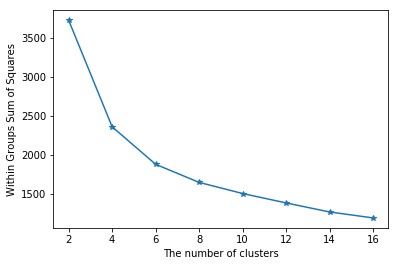

In [25]:
# using elbow method to determin k
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 18,2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2, 18,2), inertia_vals, marker='*')
plt.xlabel("The number of clusters")
plt.ylabel("Within Groups Sum of Squares")
plt.show()

In [26]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.27611808323269366
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.2703987785412884


#### d. Did you normalise the variables? What was its effect on the model–Does the variable normalization process enable a better clustering solution?
Before doing the normalisation.

In [27]:
X = df2.to_numpy()

In [28]:
model_org = KMeans(n_clusters=4, random_state=42).fit(X)

In [29]:
print("Show the mathematical measurement for the model before normalisation: ")
print("Sum of intra-cluster distance:", model_org.inertia_)
print("Centroid locations:")
for centroid in model_org.cluster_centers_:
    print(centroid)

Show the mathematical measurement for the model before normalisation: 
Sum of intra-cluster distance: 874715.5377103633
Centroid locations:
[-31.12044693  -3.94675035  31.38181818 -40.46001016 -32.00606061
  12.73357228]
[-74.91360767 -41.49374853 -67.70645083 -72.55878639 -60.26422764
  28.21303824]
[-48.06683117 -18.81725958 -29.75146007 -50.4783626  -38.25560538
  18.23134888]
[-67.27889537 -27.88613221 -14.22550426 -62.12865263 -64.069869
  24.66220073]


After doing the normalisation, we notice that the intra-cluster distance decreased significantly, which offers a better model.

In [30]:
# scaling
X = data_b_standardization(X)

Before scaling
-------------
Variable #0: min -96.0, max -2.0, mean -55.62 and std dev 18.76
Variable #1: min -75.0, max 31.0, mean -23.61 and std dev 16.16
Variable #2: min -96.0, max 121.0, mean -25.79 and std dev 34.75
Variable #3: min -91.0, max 33.0, mean -56.41 and std dev 15.96
Variable #4: min -85.0, max 13.0, mean -47.73 and std dev 17.18
Variable #5: min -2.0, max 44.0, mean 21.01 and std dev 7.08
After scaling
-------------
Variable #0: min -2.152101907639344, max 2.8583124572515697, mean 0.00 and std dev 1.00
Variable #1: min -3.181084098608301, max 3.3800095543640496, mean 0.00 and std dev 1.00
Variable #2: min -2.0205977813833007, max 4.224244681027864, mean 0.00 and std dev 1.00
Variable #3: min -2.166964451007842, max 5.602296864907721, mean 0.00 and std dev 1.00
Variable #4: min -2.169427718699248, max 3.5357329743010872, mean -0.00 and std dev 1.00
Variable #5: min -3.25242844143978, max 3.2487136960492866, mean -0.00 and std dev 1.00


In [31]:
model_std = KMeans(n_clusters=4, random_state=rs).fit(X)

print("Show the mathematical measurement for the model after normalisation: ")
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model_std.inertia_)
print("Centroid locations:")
for centroid in model_std.cluster_centers_:
    print(centroid)

Show the mathematical measurement for the model after normalisation: 
Sum of intra-cluster distance: 2359.301128558881
Centroid locations:
[-1.10892566 -1.26646555 -1.16142283 -1.16600002 -0.83649281  1.14553727]
[ 0.19836536  0.13138977 -0.14667393  0.19343695  0.4184982  -0.23848525]
[-0.62377853 -0.17178829  0.34872768 -0.32564736 -0.98393978  0.55163355]
[ 1.41582002  1.24726484  1.16558222  1.17401326  1.05019018 -1.29602884]


### 3. Visualization
#### a. Visualize the clusters using ‘pairplot’ and interpret the visualization. 

In [32]:
df2['Cluster_ID'] = model_std.predict(X)
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

Cluster membership
1    434
0    222
2    220
3    210
Name: Cluster_ID, dtype: int64


#### b. Characterize the nature of each cluster by giving it a descriptive label and a brief description. 


------ Distribution for cluster 0 ------


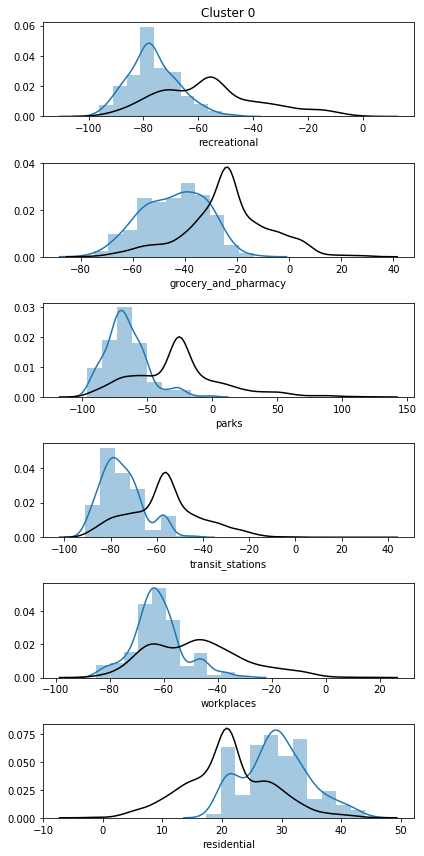


------ Distribution for cluster 1 ------


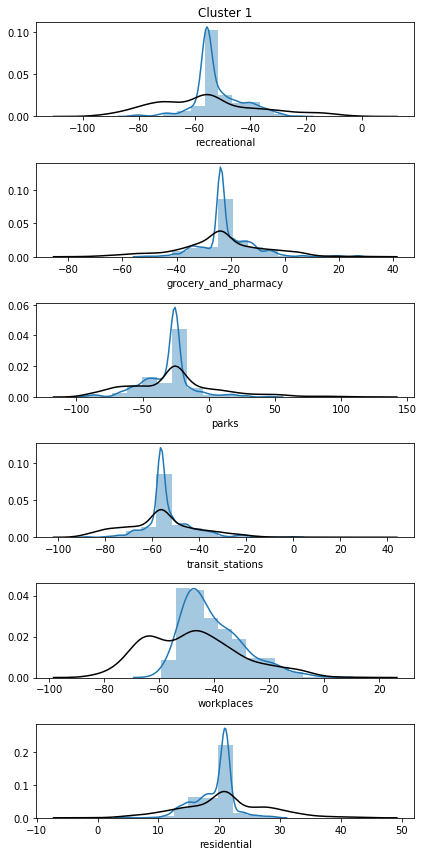


------ Distribution for cluster 2 ------


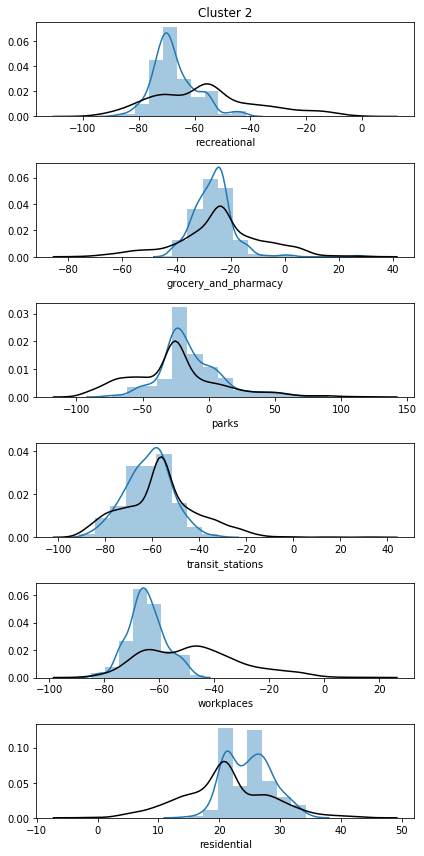


------ Distribution for cluster 3 ------


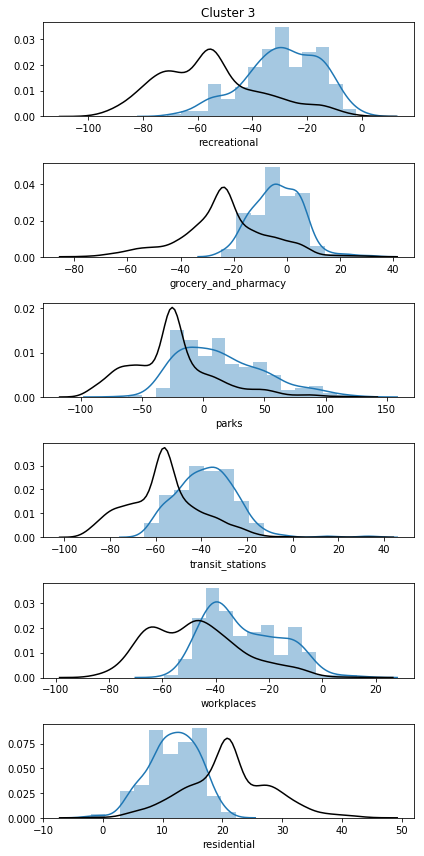

In [34]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['recreational', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
n_bins = 20

# inspecting cluster 0, 1, 2, 3
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:

    print("\n------ Distribution for cluster {}".format(cluster),"------")

    # create subplots
    fig, ax = plt.subplots(nrows=6,figsize=(6,12))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

### 4. In Particular Countries
#### Build another clustering model using an algorithm that helps to profile the people’s mobility only in the following countries:
•Australia
•United Kingdom
•Japan
•Latvia
•Romania
•Slovenia
•Kenya

Use the best setting obtained in the previous model: 
1. Pre-process
2. Z-score normalisation
3. Optimal K=4
4. Euclidean Distance for similarity calculation

In [43]:
df3=df.loc[df['country'].isin(['Australia','United Kingdom','Japan','Kenya','Latvia','Romania','Slovenia'])]
print(df3['country'].unique())
df3.info()

['Australia' 'United Kingdom' 'Japan' 'Kenya' 'Latvia' 'Romania'
 'Slovenia']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 47 to 1075
Data columns (total 8 columns):
country                 385 non-null object
region                  385 non-null object
recreational            385 non-null float64
grocery_and_pharmacy    385 non-null float64
parks                   385 non-null float64
transit_stations        385 non-null float64
workplaces              385 non-null float64
residential             385 non-null float64
dtypes: float64(6), object(2)
memory usage: 27.1+ KB


#### a. What clustering algorithm have you used?
Hierarchical Agglomerative Clustering

In [44]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [82]:
import scipy.cluster.hierarchy as hi
def plot_dendrogram2(X, labels):
    Z = hi.linkage(X, 'ward')
    fig, axes = plt.subplots(figsize=(20, 15))
    hi.dendrogram(Z, ax=axes, labels = labels, leaf_rotation=0) 
    plt.title('Hierarchical Clustering Dendrogram - 50 Samples', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("Tree Depth", fontsize=20)
    plt.xlabel("Number for Cluster", fontsize=20)
    plt.grid(False)
    plt.show()

#### b. List the attributes used in this analysis.
The attributes applied in this analysis in the importance order: `grocery_and_pharmacy` `transit_stations` `workplaces` `recreational` `parks` and `residential`.

In [88]:
df4 = pd.DataFrame(df3,columns=['grocery_and_pharmacy', 'transit_stations','workplaces','recreational', 'parks','residential'])
rs = 42

# convert df2 to matrix
X = df4.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
# apply the Agglomerative Clustering

In [89]:
agg_model = AgglomerativeClustering(n_clusters=4)
agg_model.fit(X) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [90]:
km_model = KMeans(n_clusters=4)
km_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
print("Silhouette score for HAC, k=4 :", silhouette_score(X, agg_model.labels_))
print("Silhouette score for K-Means, k=4:", silhouette_score(X, km_model.labels_))

Silhouette score for HAC, k=4 : 0.2729323848383917
Silhouette score for K-Means, k=4: 0.30027483973983443


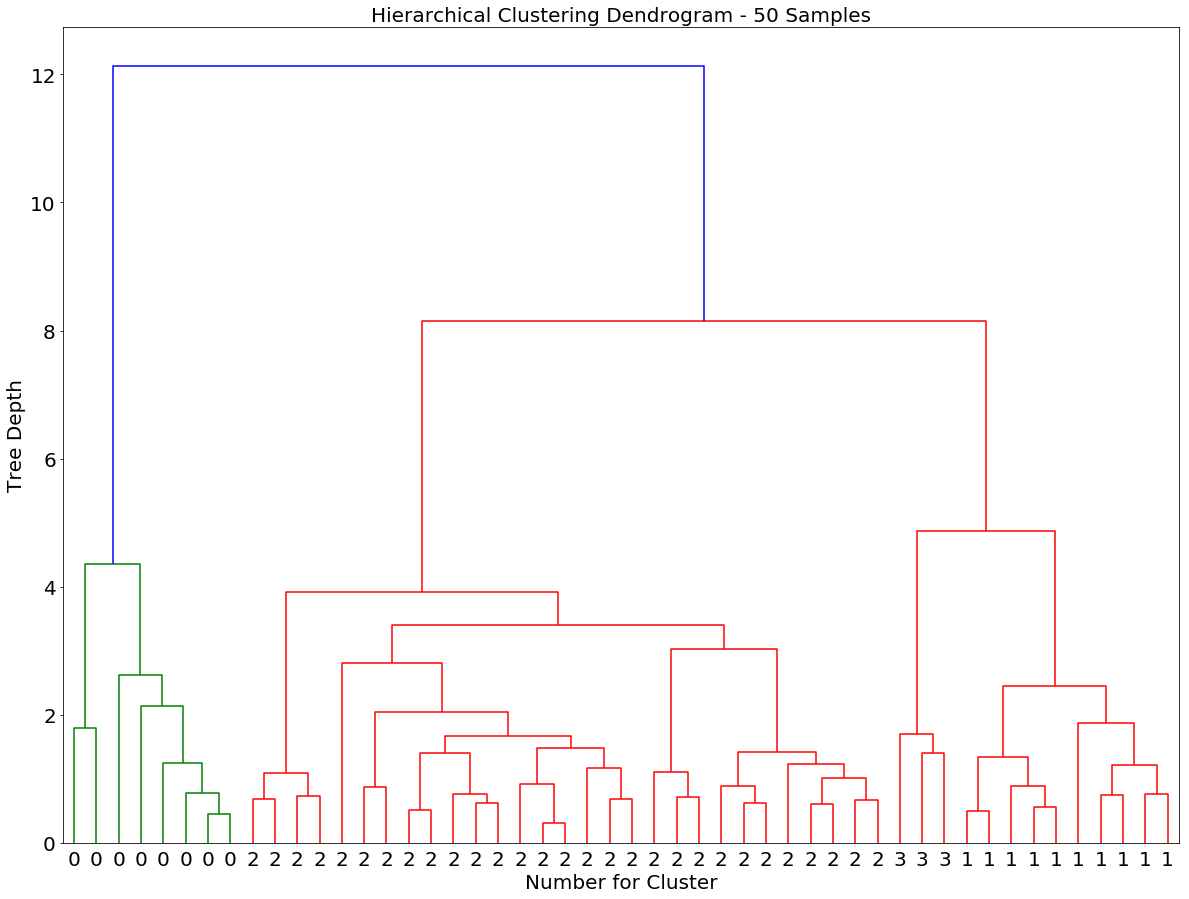

In [92]:
X2 = X[:50]
agg_model.fit(X2)
plot_dendrogram2(X2, labels=agg_model.labels_)
plt.show()

#### c. What difference do you see in this clustering interpretation when compared to the previous one?
 Visualize the clusters using ‘pairplot’and distribution.

In [94]:
agg_model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

Cluster membership
3    170
0     99
1     63
2     53
Name: Cluster_ID, dtype: int64


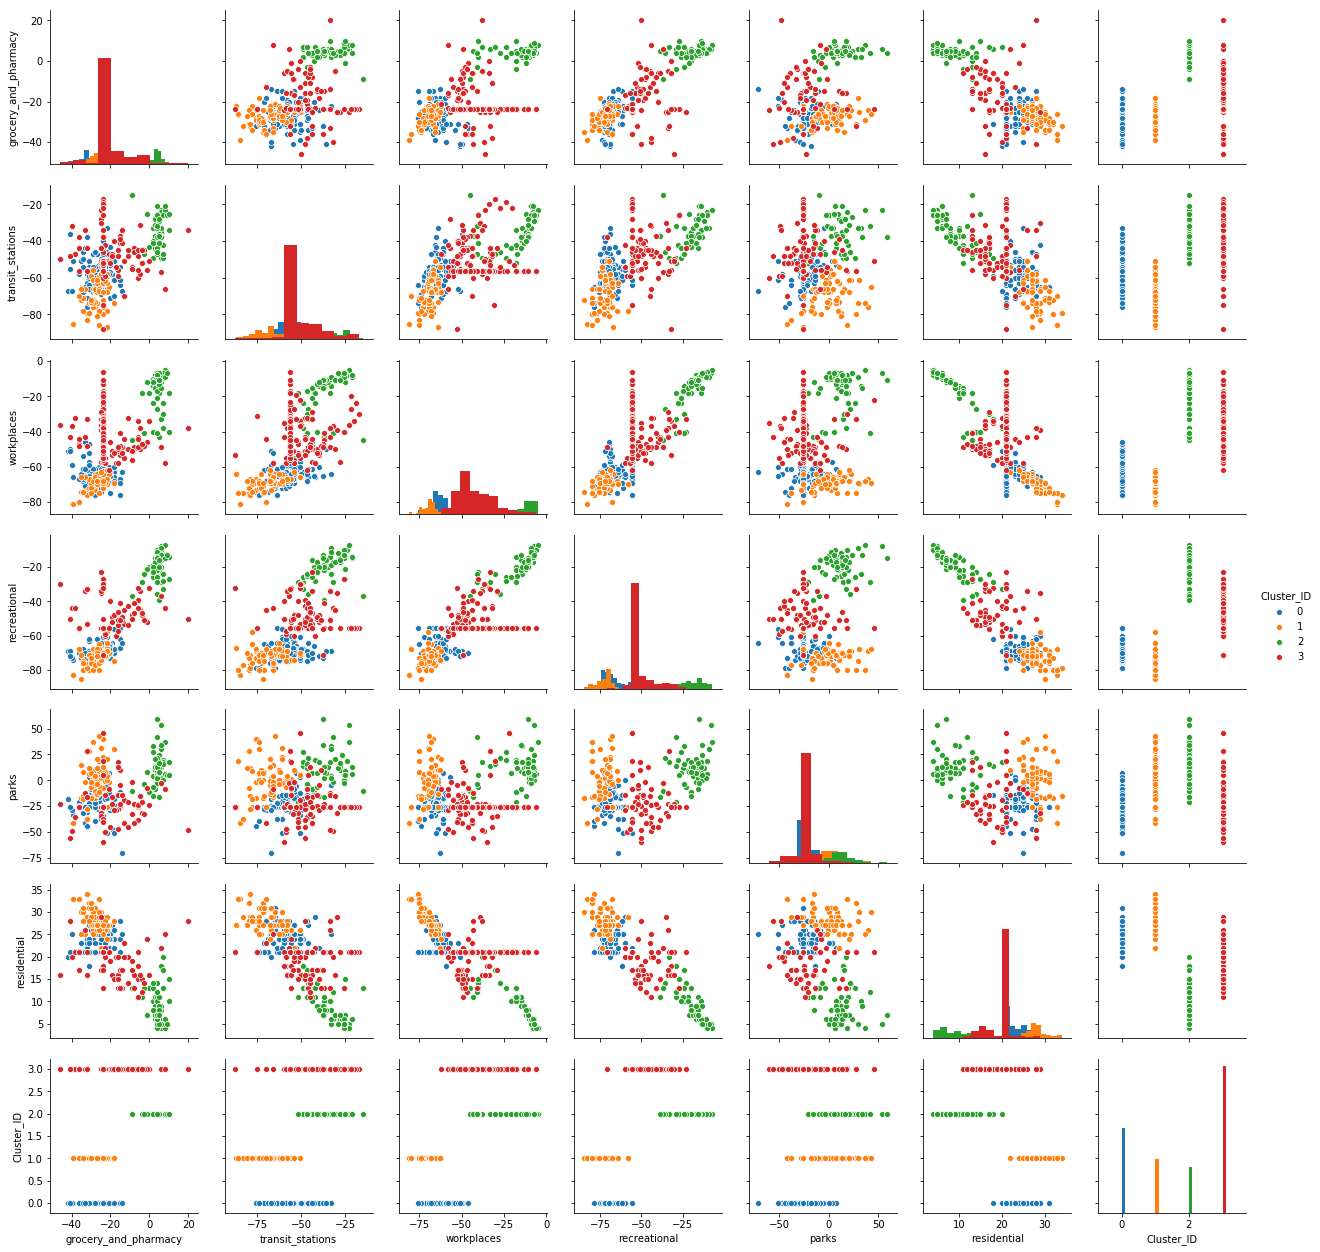

In [97]:
df4['Cluster_ID'] = km_model.labels_
print("Cluster membership")
print(df4['Cluster_ID'].value_counts())
cluster_g = sns.pairplot(df4, hue='Cluster_ID',diag_kind='hist')
plt.show()

Cluster membership
0    169
3     82
2     82
1     52
Name: Cluster_ID, dtype: int64


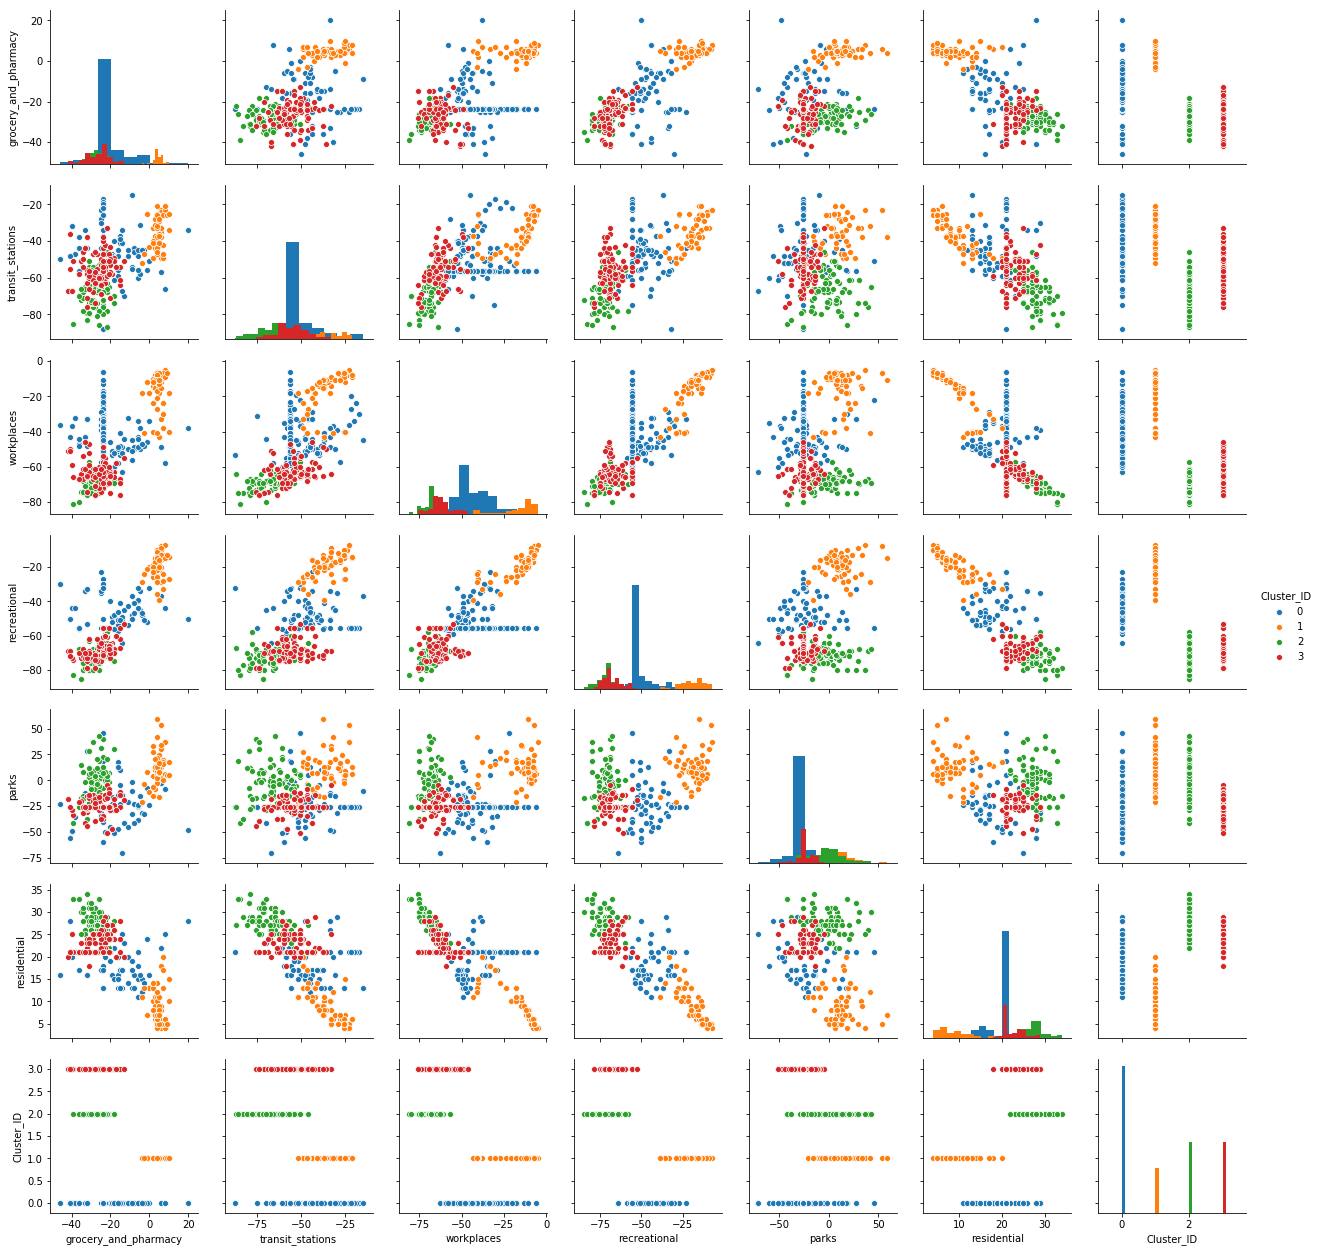

In [95]:
df4['Cluster_ID'] = agg_model.labels_
print("Cluster membership")
print(df4['Cluster_ID'].value_counts())
cluster_g = sns.pairplot(df4, hue='Cluster_ID',diag_kind='hist')
plt.show()


------ Distribution for cluster 0 ------


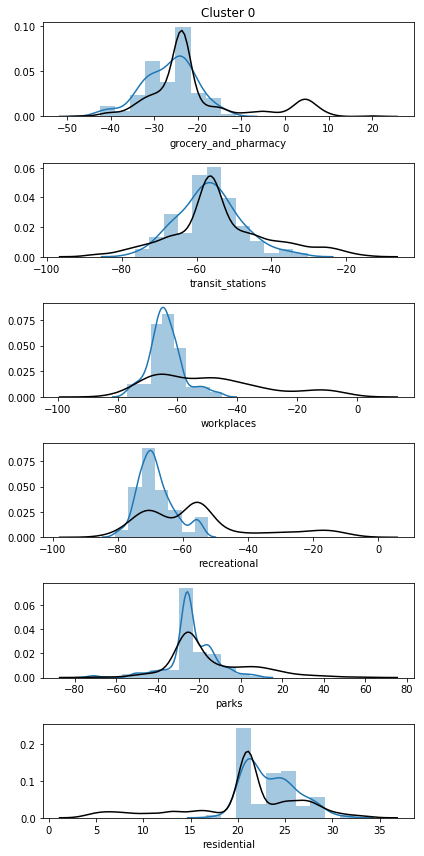


------ Distribution for cluster 1 ------


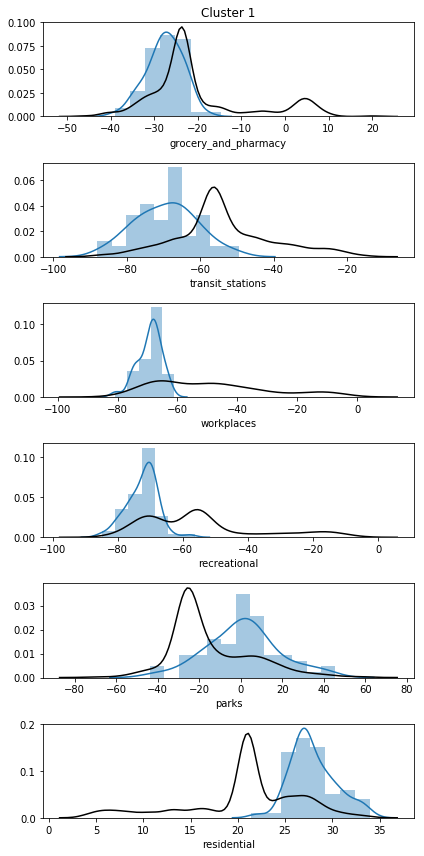


------ Distribution for cluster 2 ------


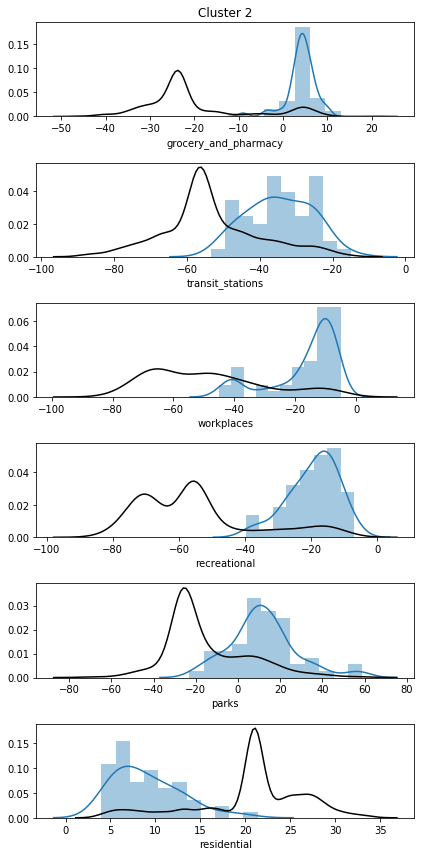


------ Distribution for cluster 3 ------


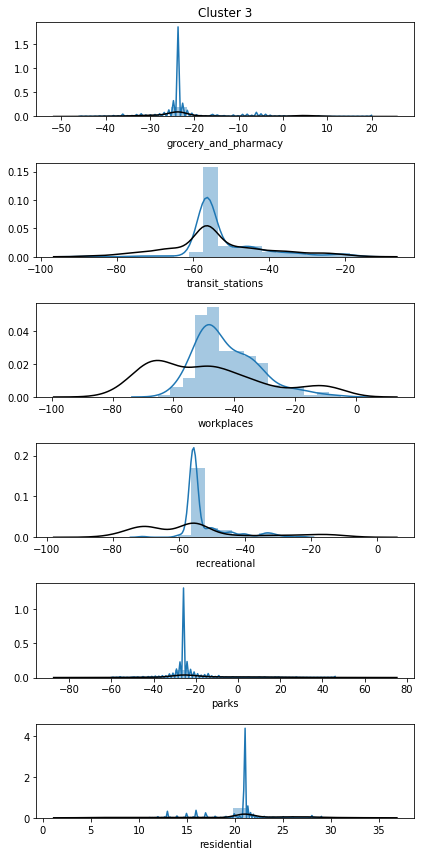

In [98]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['grocery_and_pharmacy', 'transit_stations','workplaces','recreational', 'parks','residential']
n_bins = 20

# inspecting cluster 0 1 2 and 3
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:

    print("\n------ Distribution for cluster {}".format(cluster),"------")

    # create subplots
    fig, ax = plt.subplots(nrows=6,figsize=(6,12))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df4[col]), max(df4[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df4[df4['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df4[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

---
## Project (C): Building and Evaluating Predictive models 
## Decision Tree
### Prerequisite
1. Import necessary libraries.
2. Transfor the dataset into one-hot encoding.
3. Split the data set into training (70%) and testing (30%) set.
4. Set the random seed to 10.

In [2]:
pip install pydot

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [4]:
def data_c_prep():
    df = pd.read_csv('datasets/D3.csv')
    df = pd.get_dummies(df)
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)
    rs = 10
    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = \
        train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    return X, y, X_train, X_test, y_train, y_test    

def analyse_feature_importance_dt(dm_model, feature_names, n_to_display):
    importances = dm_model.feature_importances_
    
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    indices = indices[:n_to_display]
    
    print("Top %s important variable(s) in building the model:"%n_to_display)
    for i in indices:
        print(feature_names[i], ':', importances[i])

In [5]:
X, y, X_train, X_test, y_train, y_test = data_c_prep()

### 1. Build a decision tree using the default setting.
#### a. What is the classification accuracy of training and test datasets?

In [6]:
rs = 10
model_dt_df = DecisionTreeClassifier(random_state=rs)
model_dt_df.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [7]:
print("Desicion tree with default settings")
print("Train accuracy:", model_dt_df.score(X_train, y_train))
print("Test accuracy:", model_dt_df.score(X_test, y_test))

Desicion tree with default settings
Train accuracy: 1.0
Test accuracy: 0.7737940026075619


#### b. What is the size of the tree (number of nodes and rules)?

In [8]:
n_nodes = model_dt_df.tree_.node_count
print("The tree structure has %s nodes." % n_nodes)
leaves_count=model_dt_df.get_n_leaves()
print("The tree structure has %s leaves."  % leaves_count)

The tree structure has 1123 nodes.
The tree structure has 562 leaves.


#### c. Which variable is used for the first split?

In [9]:
analyse_feature_importance_dt(model_dt_df, X.columns, 1)

Top 1 important variable(s) in building the model:
covid19_symptoms : 0.18408023483844366


#### d. What are the 3 important variables in building the tree?

In [10]:
analyse_feature_importance_dt(model_dt_df, X.columns, 3)

Top 3 important variable(s) in building the model:
covid19_symptoms : 0.18408023483844366
income_med : 0.09173148529492905
worried : 0.0718221640140854


### 2. Build another decision tree tuned with GridSearchCV. Answer the followings: 
#### Experiment Process: Finding optimal hyperparameters with GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
rs = 10
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 20),
          'min_samples_leaf': range(1, 30)}

cv_dt = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True, cv=10, n_jobs=-1)
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 30)},
             return_train_score=True)

In [13]:
result_set = cv_dt.cv_results_
pd.DataFrame(result_set)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025419,0.002427,0.001495,4.987244e-04,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729050,0.751397,...,0.736253,0.736564,0.734079,0.736875,0.734700,0.736335,0.736335,0.731988,0.735253,0.001541
1,0.037998,0.029885,0.001197,3.987920e-04,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729050,0.751397,...,0.736253,0.736564,0.734079,0.736875,0.734700,0.736335,0.736335,0.731988,0.735253,0.001541
2,0.024635,0.005935,0.001496,1.201093e-03,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729050,0.751397,...,0.736253,0.736564,0.734079,0.736875,0.734700,0.736335,0.736335,0.731988,0.735253,0.001541
3,0.024236,0.002362,0.000998,6.485687e-07,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729050,0.751397,...,0.736253,0.736564,0.734079,0.736875,0.734700,0.736335,0.736335,0.731988,0.735253,0.001541
4,0.025632,0.003733,0.001097,2.989553e-04,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729050,0.751397,...,0.736253,0.736564,0.734079,0.736875,0.734700,0.736335,0.736335,0.731988,0.735253,0.001541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.060836,0.003090,0.000998,4.460103e-04,entropy,19,25,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.807263,0.812849,...,0.836595,0.831314,0.843430,0.834731,0.832867,0.841615,0.836957,0.834161,0.836766,0.004392
1098,0.064428,0.001559,0.001197,9.772187e-04,entropy,19,26,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.807263,0.815642,...,0.834731,0.829450,0.843740,0.834731,0.835353,0.840683,0.836335,0.828261,0.835896,0.005145
1099,0.065942,0.004057,0.000998,7.726326e-04,entropy,19,27,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.804469,0.815642,...,0.834731,0.829450,0.837217,0.831625,0.829761,0.839130,0.836335,0.827329,0.834094,0.004977
1100,0.065080,0.003906,0.000798,3.991970e-04,entropy,19,28,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.798883,0.824022,...,0.833799,0.829450,0.835353,0.831314,0.829450,0.834472,0.835714,0.827329,0.832852,0.003970


In [14]:
test_result = result_set['mean_test_score']
print("Total number of models generated: ", len(test_result))
print("\nThe optimal model is built based on the hypetparameter: ")
print(cv_dt.best_params_)
model_dt_cv = cv_dt.best_estimator_
model_dt_cv.fit(X_train, y_train)
print(model_dt_cv)

Total number of models generated:  1102

The optimal model is built based on the hypetparameter: 
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 25}
DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=25,
                       random_state=10)


#### a. What is the classification accuracy of training and test datasets?

In [15]:
print("Train accuracy:", model_dt_cv.score(X_train, y_train))
print("Test accuracy:", model_dt_cv.score(X_test, y_test))

Train accuracy: 0.8319821079116578
Test accuracy: 0.8011734028683182


#### b. What is the size of the tree (i.e. number of nodes and rules)?

In [16]:
n_nodes = model_dt_cv.tree_.node_count
print("The tree structure has %s nodes and has." % n_nodes)
leaves_count=model_dt_cv.get_n_leaves()
print("The tree structure has %s leaves nodes."  % leaves_count)

The tree structure has 183 nodes and has.
The tree structure has 92 leaves nodes.


#### c. Which variable is used for the first split?

In [17]:
analyse_feature_importance_dt(model_dt_cv, X.columns, 1)

Top 1 important variable(s) in building the model:
covid19_symptoms : 0.32576593771151385


#### d. What are the 3 important variables in building the tree?

In [18]:
analyse_feature_importance_dt(model_dt_cv, X.columns, 3)

Top 3 important variable(s) in building the model:
covid19_symptoms : 0.32576593771151385
income_med : 0.1850874587586548
worried : 0.10573567447330373


#### e. Report if you see any evidence of model overfitting.

1. We fixed criterion to "entropy" and min_samples_leaf to 25, in order to explore the relationship between max_depth and the score for testing and traing dataset.

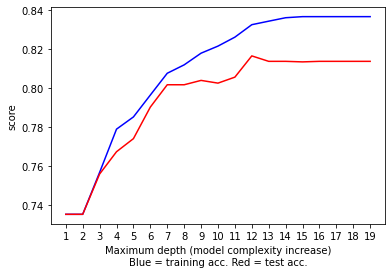

In [21]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

train_result = result_set['mean_train_score']
test_result  = result_set['mean_test_score']

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==25)])
max_depth_train = []
max_depth_test = []

for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity increase)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

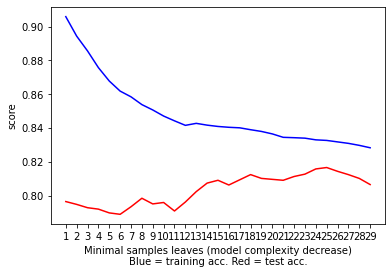

In [22]:
# visualize the accuracy of testing and training data, according to the maximum depth
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['max_depth']==12)])
min_samples_leaf_train = []
min_samples_leaf_test = []
for i in range(len(index_)):
    min_samples_leaf_train.append(train_result[index_[i]])
    min_samples_leaf_test.append(test_result[index_[i]])
plt.plot(range(1, len(min_samples_leaf_train)+1), min_samples_leaf_train, 'b', range(1,len(min_samples_leaf_test)+1), min_samples_leaf_test, 'r')
plt.xlabel('Minimal samples leaves (model complexity decrease)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(min_samples_leaf_train)+1, 1))
plt.ylabel('score')
#plt.gca().invert_xaxis()
plt.show()

### 3. What is the difference do you see between these two decision tree models (with and without fine tuning)? How do they compare performance-wise? 

In [23]:
target_names = ['Covid-19 Negative', 'Covid-19 Positive'] 
y_pred_dt_df = model_dt_df.predict(X_test) 
y_pred_dt_cv = model_dt_cv.predict(X_test) 

print("----- The static measurement for DT_df -----")
print("Accuracy score on train for DT_df:", model_dt_df.score(X_train, y_train)) 
print("Accuracy score on test for DT_df:", accuracy_score(y_test, y_pred_dt_df)) 
print(classification_report(y_test, y_pred_dt_df,target_names=target_names))
print("\n----- The static measurement for DT_cv -----")
print("Accuracy score on train for DT_df:", model_dt_cv.score(X_train, y_train)) 
print("Accuracy score on test for DT_cv:", accuracy_score(y_test, y_pred_dt_cv))
print(classification_report(y_test, y_pred_dt_cv,target_names=target_names))

----- The static measurement for DT_df -----
Accuracy score on train for DT_df: 1.0
Accuracy score on test for DT_df: 0.7737940026075619
                   precision    recall  f1-score   support

Covid-19 Negative       0.83      0.81      0.82       973
Covid-19 Positive       0.69      0.70      0.69       561

         accuracy                           0.77      1534
        macro avg       0.76      0.76      0.76      1534
     weighted avg       0.78      0.77      0.77      1534


----- The static measurement for DT_cv -----
Accuracy score on train for DT_df: 0.8319821079116578
Accuracy score on test for DT_cv: 0.8011734028683182
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.85      0.84       973
Covid-19 Positive       0.73      0.72      0.73       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.79      1534
     weighted avg       0.80      0.80      0.80      15

### Produce the ROC curve for both DTs. Explain why those changes may have happened. 

In [24]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt_df = model_dt_df.predict_proba(X_test)
y_pred_proba_dt_cv = model_dt_cv.predict_proba(X_test)

roc_index_dt_df = roc_auc_score(y_test, y_pred_proba_dt_df[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt_df)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)


ROC index on test for DT_default: 0.7590386056319193
ROC index on test for DT_optimal: 0.851946403152497


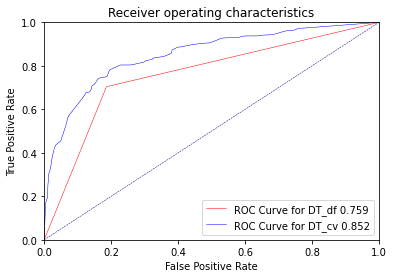

In [25]:
from sklearn.metrics import roc_curve

fpr_dt_df, tpr_dt_df, thresholds_dt_df = roc_curve(y_test, y_pred_proba_dt_df[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr_dt_df, tpr_dt_df, label='ROC Curve for DT_df {:.3f}'.format(roc_index_dt_df), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_cv {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

#### Draw the Decision Tree tuned by CV.

In [ ]:
dotfile = StringIO()
export_graphviz(model_dt_cv, out_file=dotfile, class_names=['Covid-19 Negative','Covid-10 Positive'],feature_names=X.columns,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("decision_tree.png")

#### Save the optimal hyperparameters of Decision Tree

In [36]:
import pickle
dt_best=model_dt_cv
with open ('DT.pickle','wb') as f:
    pickle.dump([dt_best, roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [26]:
analyse_feature_importance_dt(model_dt_cv, X.columns, 10)

Top 10 important variable(s) in building the model:
covid19_symptoms : 0.32576593771151385
income_med : 0.1850874587586548
worried : 0.10573567447330373
working_travel critical : 0.057236587454836785
weight : 0.04675426322376918
risk_mortality : 0.045004191270992734
race_white : 0.029124408151649326
income_high : 0.02696117455064086
health_worker : 0.023326618373504485
contacts_count : 0.022780638007530402


---
## Logistic Regression
### Prerequisite
1. Import necessary libraries.
2. define `analyse_feature_importance_lr` and `data_c_standardization` functions.
3. pre-process dataset similar with Decision Tree Mining.

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

In [76]:
def data_c_prep():
    df = pd.read_csv('datasets/D3.csv')
    df = pd.get_dummies(df)
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)
    rs = 10
    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    return X,y,X_train, X_test, y_train, y_test  

def analyse_feature_importance_lr(model, X, n_to_display):
    coef = model.coef_[0]
    feature_names = X.columns

    indices = np.argsort(np.absolute(coef))
    indices = np.flip(indices, axis=0)

    indices = indices[:n_to_display]
    
    print("\nTop %s important variable(s) in building the model:"%n_to_display)
    for i in indices:
        print(feature_names[i], ':', coef[i])

def data_c_standardization(X_train, X_test):
    scaler = StandardScaler()

    print("Before scaling\n-------------")
    for i in range(5):
        col = X_train[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col)))

    X_train = scaler.fit_transform(X_train, y_train)
    print("After scaling\n-------------")
    for i in range(5):
        col = X_train[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col)))

    X_test = scaler.transform(X_test)
    return X_train, X_test 

In [77]:
X, y, X_train, X_test, y_train, y_test = data_c_prep()
target_names = ['Covid-19 Negative', 'Covid-19 Positiv']
X_train, X_test = data_c_standardization(X_train, X_test)

Before scaling
-------------
Variable #0: min -5.63615808, max 6.0157395629999995, mean -0.01 and std dev 1.02
Variable #1: min 44.0, max 180.0, mean 83.72 and std dev 23.28
Variable #2: min 0.0, max 21.0, mean 7.52 and std dev 6.50
Variable #3: min 1.0, max 11.0, mean 3.00 and std dev 1.66
Variable #4: min 0.0, max 15.0, mean 0.26 and std dev 1.35
After scaling
-------------
Variable #0: min -5.5423252906385265, max 5.926786627528356, mean 0.00 and std dev 1.00
Variable #1: min -1.7059777428851117, max 4.135828798791922, mean -0.00 and std dev 1.00
Variable #2: min -1.1566827692417236, max 2.0724945060558584, mean 0.00 and std dev 1.00
Variable #3: min -1.2067053026284458, max 4.820081722646548, mean -0.00 and std dev 1.00
Variable #4: min -0.19309858947124736, max 10.887869130400171, mean -0.00 and std dev 1.00


### 1. Build a regression model using the default regression method with all inputs.

In [78]:
rs=10
model_lr_df = LogisticRegression(random_state=rs)
model_lr_df.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [79]:
print("Train accuracy:", model_lr_df.score(X_train, y_train))
print("Test accuracy:",  model_lr_df.score(X_test, y_test))
y_pred_lr_df = model_lr_df.predict(X_test)
print("\n", classification_report(y_test, y_pred_lr_df,target_names=target_names))

Train accuracy: 0.8185630416550181
Test accuracy: 0.8044328552803129

                    precision    recall  f1-score   support

Covid-19 Negative       0.82      0.88      0.85       973
 Covid-19 Positiv       0.76      0.68      0.72       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



### Build another regression model tuned with GridSearchCV.

In [80]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv_lr = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=10), 
                         return_train_score=True, cv=10, n_jobs=-1)
cv_lr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [81]:
print("The optimal model is built based on the hypetparameter: %s"%cv_lr.best_params_)
model_lr_cv = cv_lr.best_estimator_
model_lr_cv.fit(X_train, y_train)
print(model_lr_cv)

The optimal model is built based on the hypetparameter: {'C': 0.1}
LogisticRegression(C=0.1, random_state=10)


In [82]:
print("Train accuracy:", model_lr_cv.score(X_train, y_train))
print("Test accuracy:",  model_lr_cv.score(X_test, y_test))
y_pred_lr_cv = model_lr_cv.predict(X_test)
print("\n", classification_report(y_test, y_pred_lr_cv,target_names=target_names))

Train accuracy: 0.8152082750908582
Test accuracy: 0.8044328552803129

                    precision    recall  f1-score   support

Covid-19 Negative       0.82      0.88      0.85       973
 Covid-19 Positiv       0.77      0.67      0.71       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



#### e. Report the top-3 important variables (in the order) in the model.*

In [83]:
analyse_feature_importance_lr(model_lr_cv, X, 3)


Top 3 important variable(s) in building the model:
covid19_symptoms : 0.9461350312109171
income_high : -0.443243843802611
income_med : 0.4286313471062448


#### f. What is classification accuracy on training and test datasets?

In [84]:
target_names = ['Covid-19 Negative', 'Covid-19 Positiv']
print("Train accuracy:", model_lr_cv.score(X_train, y_train))
print("Test accuracy:", model_lr_cv.score(X_test, y_test))
y_pred_lr_cv = model_lr_cv.predict(X_test)
print("\n", classification_report(y_test, y_pred_lr_cv,labels=[0,1],target_names=target_names))

Train accuracy: 0.8152082750908582
Test accuracy: 0.8044328552803129

                    precision    recall  f1-score   support

Covid-19 Negative       0.82      0.88      0.85       973
 Covid-19 Positiv       0.77      0.67      0.71       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



#### g. Report any sign of overfitting in this model.

In [85]:
result_set = cv_lr.cv_results_
pd.DataFrame(result_set)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.086150,0.037725,0.001196,0.000598,1e-06,{'C': 1e-06},0.634078,0.634078,0.634078,0.634078,...,0.634048,0.634048,0.634048,0.634048,0.634048,0.633851,0.634161,0.634161,0.634051,0.000080
1,0.079871,0.055644,0.002692,0.004112,1e-05,{'C': 1e-05},0.634078,0.634078,0.634078,0.634078,...,0.634048,0.634048,0.634048,0.634048,0.634048,0.633851,0.634161,0.634161,0.634051,0.000080
2,0.057493,0.006911,0.001255,0.000408,0.0001,{'C': 0.0001},0.639665,0.648045,0.639665,0.639665,...,0.643368,0.642746,0.642746,0.642436,0.643057,0.640994,0.644099,0.640994,0.642624,0.001112
3,0.055352,0.005923,0.001801,0.001061,0.001,{'C': 0.001},0.734637,0.824022,0.765363,0.770950,...,0.789686,0.788754,0.790929,0.789065,0.789997,0.790994,0.790683,0.787578,0.789053,0.002500
4,0.087844,0.013534,0.001300,0.000467,0.01,{'C': 0.01},0.756983,0.826816,0.773743,0.807263,...,0.815160,0.815471,0.812364,0.815781,0.813607,0.818634,0.809317,0.809006,0.813842,0.003009
5,0.188008,0.031258,0.001515,0.000671,0.1,{'C': 0.1},0.756983,0.821229,0.776536,0.801676,...,0.816403,0.816092,0.815471,0.818888,0.817024,0.821118,0.813354,0.813354,0.816544,0.002722
6,0.247500,0.063858,0.001447,0.000469,1,{'C': 1},0.756983,0.821229,0.776536,0.804469,...,0.817024,0.817335,0.816713,0.818577,0.816713,0.820497,0.812422,0.813354,0.816668,0.002597
7,0.315416,0.091525,0.001596,0.000913,10,{'C': 10},0.756983,0.821229,0.776536,0.804469,...,0.816713,0.817645,0.817024,0.819199,0.817024,0.820807,0.812733,0.813354,0.816855,0.002654
8,0.317168,0.082170,0.002095,0.002974,100,{'C': 100},0.756983,0.821229,0.776536,0.804469,...,0.816713,0.817645,0.817024,0.819199,0.817024,0.820807,0.812733,0.813665,0.816886,0.002614
9,0.218812,0.046698,0.001301,0.000464,1000,{'C': 1000},0.756983,0.821229,0.776536,0.804469,...,0.816713,0.817645,0.817024,0.819199,0.817024,0.820807,0.812733,0.813665,0.816886,0.002614


Total number of models generated:  10
Total number of models:  10


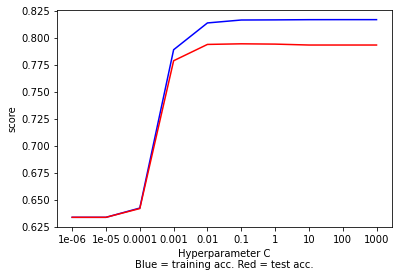

In [86]:
result_set = cv_lr.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models generated: ", len(train_result))
print("Total number of models: ", len(test_result))
plt.plot(range(0, len(train_result)), train_result, 'b', 
             range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

### 2.Build another regression model on the reduced variables set. Perform dimensionality reduction with Recursive feature elimination. Tune the model withGridSearchCV to find the best parameter setting. 

If you run the code from top to here, the dataset have been standard scaled. 

In [87]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10,n_jobs=-1 )
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 170
Number of features after elimination 142


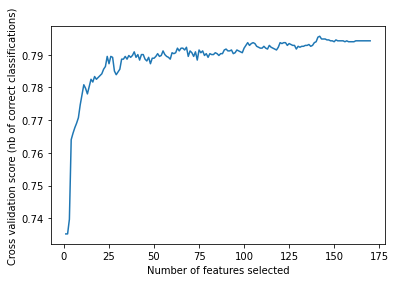

In [88]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [89]:
# acquire the new dataset after feature elimination
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [90]:
# generate the model tuned with Grid Search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
rfe_cv_lr = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
rfe_cv_lr.fit(X_train_sel, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [91]:
print("This model built based on the hypetparameter: %s"%rfe_cv_lr.best_params_)

#generate the model withe the best parameters option via cross validation
model_lr_rfe_cv = rfe_cv_lr.best_estimator_

model_lr_rfe_cv.fit(X_train_sel, y_train)
print(model_lr_rfe_cv)

This model built based on the hypetparameter: {'C': 0.1}
LogisticRegression(C=0.1, random_state=10)


#### b. What is classification accuracy on training and test datasets?

In [92]:
# test the best model
print("Logistice Regression model generated by dimensionality reduction and Tuning by GridSearchCV")
print("Train accuracy:", model_lr_rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", model_lr_rfe_cv.score(X_test_sel, y_test))

y_pred_lr_rfe_cv = model_lr_rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred_lr_rfe_cv,target_names=target_names))

Logistice Regression model generated by dimensionality reduction and Tuning by GridSearchCV
Train accuracy: 0.8160469667318982
Test accuracy: 0.8057366362451108
                   precision    recall  f1-score   support

Covid-19 Negative       0.82      0.88      0.85       973
 Covid-19 Positiv       0.77      0.67      0.72       561

         accuracy                           0.81      1534
        macro avg       0.80      0.78      0.78      1534
     weighted avg       0.80      0.81      0.80      1534



#### c. Report any sign of overfitting.

Total number of models generated:  10
Total number of models:  10


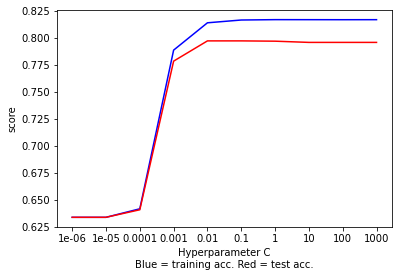

In [93]:
result_set = rfe_cv_lr.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models generated: ", len(train_result))
print("Total number of models: ", len(test_result))
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

#### d. Report the top-3 important variables (in the order) in the model.

In [94]:
analyse_feature_importance_lr(model_lr_rfe_cv, X, 3)


Top 3 important variable(s) in building the model:
covid19_symptoms : 0.9450588532183448
sex_other : -0.44373579219654435
age_100_110 : 0.42875150880286567


### 3. Produce the ROC curve for all different regression models. Using the best regression model, can you identify which patients could potentially be "COVID-19 Positive"? Can you provide general characteristics of those patients?

In [95]:
analyse_feature_importance_lr(model_lr_rfe_cv, X, 10)


Top 10 important variable(s) in building the model:
covid19_symptoms : 0.9450588532183448
sex_other : -0.44373579219654435
age_100_110 : 0.42875150880286567
insurance_no : 0.40844007830131246
weight : 0.2910921010704258
covid19_contact : 0.28029116199093523
blood_type_op : -0.22541619823804002
house_count : 0.21415541364002585
country_LU : 0.20444061769065014
country_SG : 0.202757315152485


In [96]:
y_pred_proba_lr_df      = model_lr_df.predict_proba(X_test)
y_pred_proba_lr_cv      = model_lr_cv.predict_proba(X_test)
y_pred_proba_lr_rfe_cv  = model_lr_rfe_cv.predict_proba(X_test_sel)

roc_index_lr_df      = roc_auc_score(y_test, y_pred_proba_lr_df[:, 1])
roc_index_lr_cv      = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_lr_rfe_cv  = roc_auc_score(y_test, y_pred_proba_lr_rfe_cv[:, 1])

print("ROC index on test for LR_df:", roc_index_lr_df)
print("ROC index on test for LR_cv:", roc_index_lr_cv)
print("ROC index on test for LR_rfe_cv:", roc_index_lr_rfe_cv)

ROC index on test for LR_default: 0.8616349090322852
ROC index on test for lR_cv: 0.8631206570267087
ROC index on test for lR_rfe_cv: 0.8632195847599995


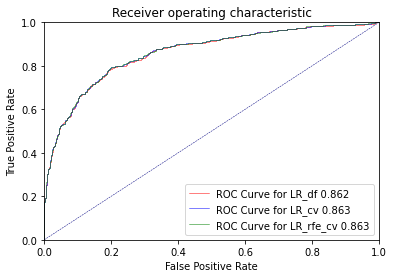

In [97]:
fpr_lr_df,     tpr_lr_df,      thresholds_lr_df      = roc_curve(y_test, y_pred_proba_lr_df[:,1])
fpr_lr_cv,     tpr_lr_cv,      thresholds_lr_cv      = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_lr_rfe_cv, tpr_lr_rfe_cv,  thresholds_lr_rfe_cv  = roc_curve(y_test, y_pred_proba_lr_rfe_cv[:,1])

plt.plot(fpr_lr_df,     tpr_lr_df,      label='ROC Curve for LR_df {:.3f}'.format(roc_index_lr_df), color='red', lw=0.5)
plt.plot(fpr_lr_cv,     tpr_lr_cv,      label='ROC Curve for LR_cv {:.3f}'.format(roc_index_lr_cv), color='blue', lw=0.5)
plt.plot(fpr_lr_rfe_cv, tpr_lr_rfe_cv,  label='ROC Curve for LR_rfe_cv {:.3f}'.format(roc_index_lr_rfe_cv), color='green', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Save the optimal hyperparameters of Logistic Regression Model

In [98]:
import pickle
lr_best=model_lr_rfe_cv
with open ('LR.pickle','wb') as f:
    pickle.dump([lr_best,roc_index_lr_rfe_cv,fpr_lr_rfe_cv,tpr_lr_rfe_cv],f)

---
## Neural Networks
### Prerequisite
1. Import necessary libraries.
2. define `analyse_feature_importance_lr` and `data_standardization` functions.
3. pre-process dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
def data_c_prep():
    rs = 10
    df = pd.read_csv('datasets/D3.csv')
    df = pd.get_dummies(df)
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)
    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    return X,y,X_train, X_test, y_train, y_test 

def data_c_standardization(X_train, X_test):
    scaler = StandardScaler()

    print("Before scaling\n-------------")
    for i in range(5):
        col = X_train[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col)))
    X_train = scaler.fit_transform(X_train, y_train)
    print("After scaling\n-------------")
    for i in range(5):
        col = X_train[:,i]
        print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
              format(i, min(col), max(col), np.mean(col), np.std(col))) 
    X_test = scaler.transform(X_test)
    return X_train, X_test 

In [3]:
rs=10
X, y, X_train, X_test, y_train, y_test = data_c_prep()
X_train, X_test = data_c_standardization(X_train, X_test)

Before scaling
-------------
Variable #0: min -5.63615808, max 6.0157395629999995, mean -0.01 and std dev 1.02
Variable #1: min 44.0, max 180.0, mean 83.72 and std dev 23.28
Variable #2: min 0.0, max 21.0, mean 7.52 and std dev 6.50
Variable #3: min 1.0, max 11.0, mean 3.00 and std dev 1.66
Variable #4: min 0.0, max 15.0, mean 0.26 and std dev 1.35
After scaling
-------------
Variable #0: min -5.5423252906385265, max 5.926786627528356, mean 0.00 and std dev 1.00
Variable #1: min -1.7059777428851117, max 4.135828798791922, mean -0.00 and std dev 1.00
Variable #2: min -1.1566827692417236, max 2.0724945060558584, mean 0.00 and std dev 1.00
Variable #3: min -1.2067053026284458, max 4.820081722646548, mean -0.00 and std dev 1.00
Variable #4: min -0.19309858947124736, max 10.887869130400171, mean -0.00 and std dev 1.00


### 1. Build a Neural Network model using the default setting.
#### a. Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
As the default set, the parameters setting are as below:
`hidden_layer_sizes=(100,)`,`activation='relu'`, `solver='adam'`, `alpha=0.0001`, `batch_size='auto'`,`learning_rate='constant'`, `learning_rate_init=0.001`, `power_t=0.5`, `max_iter=200`, `shuffle=True`, `random_state=None`, `tol=0.0001`, `verbose=False`, `warm_start=False`, `momentum=0.9`, `nesterovs_momentum=True`, `early_stopping=False`, `validation_fraction=0.1`, `beta_1=0.9`, `beta_2=0.999`, `epsilon=1e-08`, `n_iter_no_change=10`, `max_fun=15000`

In [4]:
model_nn_df = MLPClassifier(random_state=rs)
model_nn_df.fit(X_train, y_train)
print(model_nn_df)

MLPClassifier(random_state=10)


C:\Users\n10306986\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
print("Train Shape = ", X_train.shape)
print("Number of layers = ", model_nn_df.n_layers_)
print("Number of outputs = ", model_nn_df.n_outputs_)

Train Shape =  (3577, 170)
Number of layers =  3
Number of outputs =  1


#### b. What is classification accuracy on training and test datasets? 

In [6]:
target_names = ['Covid-19 Negative', 'Covid-19 Positive'] 
print("Neural Networks model with default setting.")
print("Train accuracy:", model_nn_df.score(X_train, y_train))
print("Test accuracy:", model_nn_df.score(X_test, y_test))
y_pred = model_nn_df.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

Neural Networks model with default setting.
Train accuracy: 0.9974839250768801
Test accuracy: 0.803129074315515
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.86      0.85       973
Covid-19 Positive       0.74      0.71      0.73       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.79      1534
     weighted avg       0.80      0.80      0.80      1534



Tune `max_iter`: 500 is the smallest iteration number that lead to convergence. 

In [7]:
model_nn_iter = MLPClassifier(max_iter=500, random_state=rs)
model_nn_iter.fit(X_train, y_train)
print(model_nn_iter)

MLPClassifier(max_iter=500, random_state=10)


In [8]:
print("Neural Networks model with max_iter=500.")
print("Train accuracy:", model_nn_iter.score(X_train, y_train))
print("Test accuracy:", model_nn_iter.score(X_test, y_test))
y_pred = model_nn_iter.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

Neural Networks model with max_iter=500.
Train accuracy: 0.9997204361196533
Test accuracy: 0.7907431551499348
                   precision    recall  f1-score   support

Covid-19 Negative       0.83      0.85      0.84       973
Covid-19 Positive       0.72      0.69      0.71       561

         accuracy                           0.79      1534
        macro avg       0.78      0.77      0.77      1534
     weighted avg       0.79      0.79      0.79      1534



### 2. Refine this network by tuning it with GridSearchCV. Report the trained model. 
#### a. Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc. 
For most data mining tasks,  a single hidden layer with neurons no more than the number of input variables and no less than output neurons is sufficient. Thus, we need to know the train shape.

Firstly, we roughly find the optimal scope of `hidden_layer_sizes`.

In [9]:
params = {'hidden_layer_sizes': [(x,) for x in range(10, 170, 10)]}
cv_nn_1 = GridSearchCV(param_grid=params, estimator=\
                       MLPClassifier(max_iter=500,random_state=rs), \
                       return_train_score=True, cv=10, n_jobs=-1)
cv_nn_1.fit(X_train, y_train)
print("Neural Networks model Tuning by GridSearchCV with:",cv_nn_1.best_params_)

Neural Networks model Tuning by GridSearchCV with: {'hidden_layer_sizes': (110,)}


In [10]:
print("Neural Networks model Tuning by GridSearchCV with:",cv_nn_1.best_params_)
print("Train accuracy:", cv_nn_1.score(X_train, y_train))
print("Test accuracy:", cv_nn_1.score(X_test, y_test))
y_pred = cv_nn_1.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

Neural Networks model Tuning by GridSearchCV with: {'hidden_layer_sizes': (110,)}
Train accuracy: 0.9994408722393067
Test accuracy: 0.7992177314211213
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.85      0.84       973
Covid-19 Positive       0.73      0.71      0.72       561

         accuracy                           0.80      1534
        macro avg       0.78      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



In [11]:
params = {'hidden_layer_sizes':  [(105,), (110,), (115,), (120,)]}
cv_nn_2 = GridSearchCV(param_grid=params, estimator=\
                       MLPClassifier(max_iter=500,random_state=rs), \
                       return_train_score=True, cv=10, n_jobs=-1)
cv_nn_2.fit(X_train, y_train)
print("Neural Networks model Tuning by GridSearchCV with:",cv_nn_2.best_params_)

Neural Networks model Tuning by GridSearchCV with: {'hidden_layer_sizes': (110,)}


In [12]:
print("Neural Networks model Tuning by GridSearchCV with:",cv_nn_2.best_params_)
print("Train accuracy:", cv_nn_2.score(X_train, y_train))
print("Test accuracy:", cv_nn_2.score(X_test, y_test))
y_pred = cv_nn_2.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

Neural Networks model Tuning by GridSearchCV with: {'hidden_layer_sizes': (110,)}
Train accuracy: 0.9994408722393067
Test accuracy: 0.7992177314211213
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.85      0.84       973
Covid-19 Positive       0.73      0.71      0.72       561

         accuracy                           0.80      1534
        macro avg       0.78      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



Next step, we will tune `alpha`.
With the best parameter, we can get the accuracy.

In [13]:
params = {'hidden_layer_sizes':  [(105,), (110,), (115,), (120,)],\
          'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv_nn_3 = GridSearchCV(param_grid=params, estimator=\
                       MLPClassifier(max_iter=500, random_state=rs), \
                       return_train_score=True,cv=10, n_jobs=-1)
cv_nn_3.fit(X_train, y_train)
print("Neural Networks model Tuning by GridSearchCV with:",cv_nn_3.best_params_)

Neural Networks model Tuning by GridSearchCV with: {'alpha': 0.001, 'hidden_layer_sizes': (110,)}


In [14]:
print("Train accuracy:", cv_nn_3.score(X_train, y_train))
print("Test accuracy:", cv_nn_3.score(X_test, y_test))
y_pred = cv_nn_3.predict(X_test)
print(classification_report(y_test, y_pred,target_names=target_names))

Train accuracy: 0.9994408722393067
Test accuracy: 0.8018252933507171
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.85      0.85       973
Covid-19 Positive       0.74      0.71      0.72       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



In [15]:
print("The Neural Networks model finally built based on the hypetparameter: ", cv_nn_3.best_params_)

The Neural Networks model finally built based on the hypetparameter:  {'alpha': 0.001, 'hidden_layer_sizes': (110,)}


In [16]:
model_nn_cv = cv_nn_3.best_estimator_
model_nn_cv.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(110,), max_iter=500,
              random_state=10)

In [17]:
print("Train Shape = ", X_train.shape)
print("Number of layers = ", model_nn_cv.n_layers_)
print("Number of outputs = ", model_nn_cv.n_outputs_)

Train Shape =  (3577, 170)
Number of layers =  3
Number of outputs =  1


#### b. What is classification accuracy on training and test datasets? 

In [18]:
y_pred_nn_cv = model_nn_cv.predict(X_test) 
print("\n----- The static measurement for NN_cv -----")
print("Train accuracy:", model_nn_cv.score(X_train, y_train))
print("Test accuracy:", accuracy_score(y_test,y_pred_nn_cv))
print(classification_report(y_test, y_pred_nn_cv,target_names=target_names))


----- The static measurement for NN_cv -----
Train accuracy: 0.9994408722393067
Test accuracy: 0.8018252933507171
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.85      0.85       973
Covid-19 Positive       0.74      0.71      0.72       561

         accuracy                           0.80      1534
        macro avg       0.79      0.78      0.78      1534
     weighted avg       0.80      0.80      0.80      1534



#### d. Do you see any sign of over-fitting? 

In [19]:
params = {'hidden_layer_sizes':  [(105,), (110,), (115,), (120,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}
result_set = cv_nn_3.cv_results_
pd.DataFrame(result_set)
dd = pd.DataFrame(result_set['params'])
dd.head(10)

,alpha,hidden_layer_sizes
0,0.0100,"(105,)"
1,0.0100,"(110,)"
2,0.0100,"(115,)"
3,0.0100,"(120,)"
4,0.0010,"(105,)"
5,0.0010,"(110,)"
6,0.0010,"(115,)"
7,0.0010,"(120,)"
8,0.0001,"(105,)"
9,0.0001,"(110,)"


In [20]:
train_result = result_set['mean_train_score']
test_result  = result_set['mean_test_score']

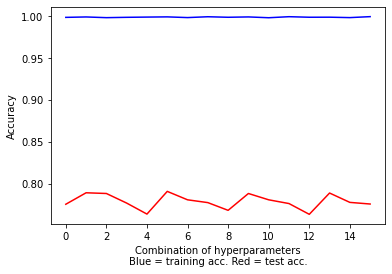

In [21]:
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('Accuracy')
plt.show()

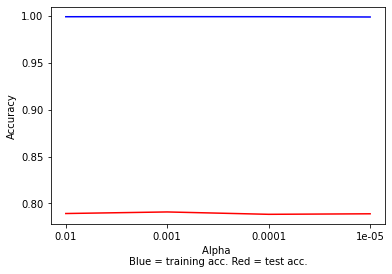

In [22]:
index_ = list(dd.index[(dd['hidden_layer_sizes']==(110, ))])
alpha_train = []
alpha_test  = []
for i in range(len(index_)):
    alpha_train.append(train_result[index_[i]])
    alpha_test.append(test_result[index_[i]])
    
plt.plot(range(1, len(alpha_train)+1), alpha_train, 'b', range(1,len(alpha_test)+1), alpha_test, 'r')
plt.xlabel('Alpha \nBlue = training acc. Red = test acc.')
plt.xticks(range(1, 5), [0.01, 0.001, 0.0001, 0.00001])
plt.ylabel('Accuracy')
plt.show()

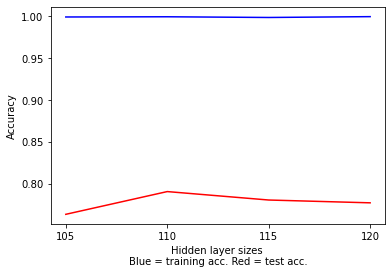

In [23]:
index_ = list(dd.index[(dd['alpha']==0.0010)])
hidden_train = []
hidden_test  = []
for i in range(len(index_)):
    hidden_train.append(train_result[index_[i]])
    hidden_test.append(test_result[index_[i]])
plt.plot(range(1, len(hidden_train)+1), hidden_train, 'b', range(1,len(hidden_test)+1), hidden_test, 'r')
plt.xlabel('Hidden layer sizes \nBlue = training acc. Red = test acc.')
plt.xticks(range(1, 5), [105, 110, 115, 120])
plt.ylabel('Accuracy')
plt.show()

### 3. Would feature selection help in improving the model? Build another Neural Network model with reduced features set. Perform dimensionality reduction by selecting variables with the decision tree (use the best decision tree model).

In [24]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
print(dt_best)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=25,
                       random_state=10)


In [25]:
selectmodel = SelectFromModel(dt_best, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(3577, 20)


### Tune the model with GridSearchCV to find the best parameters setting.

In [35]:
params = {'hidden_layer_sizes': [(x,) for x in range(2, 20, 2)]}
cv_sel_model_1 = GridSearchCV(param_grid=params, estimator=\
                              MLPClassifier(max_iter = 500, random_state=10), \
                              return_train_score=True,cv=10, n_jobs=-1) 
cv_sel_model_1.fit(X_train_sel_model, y_train)
print("Neural Networks model selected after RFE Tuning by GridSearchCV with:",\
      cv_sel_model_1.best_params_)

Neural Networks model selected after RFE Tuning by GridSearchCV with: {'hidden_layer_sizes': (8,)}


In [52]:
params = {'hidden_layer_sizes':  [(6,), (7,), (8,), (9,)]}
cv_sel_model_2 = GridSearchCV(param_grid=params, estimator=\
                              MLPClassifier(max_iter = 500, random_state=10), \
                              return_train_score=True,cv=10, n_jobs=-1) 
cv_sel_model_2.fit(X_train_sel_model, y_train)
print("Neural Networks model selected RFE Tuning by GridSearchCV with:",\
      cv_sel_model_2.best_params_)

Neural Networks model selected RFE Tuning by GridSearchCV with: {'hidden_layer_sizes': (8,)}


In [53]:
params = {'hidden_layer_sizes':  [(6,), (7,), (8,), (9,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}
cv_sel_model_3 = GridSearchCV(param_grid=params, estimator=\
                              MLPClassifier(max_iter = 500, random_state=10), \
                              return_train_score=True,cv=10, n_jobs=-1) 
cv_sel_model_3.fit(X_train_sel_model, y_train)
print("Neural Networks model selected RFE Tuning by GridSearchCV with:",\
      cv_sel_model_3.best_params_)

Neural Networks model selected RFE Tuning by GridSearchCV with: {'alpha': 0.0001, 'hidden_layer_sizes': (8,)}


In [45]:
print("Train accuracy:", cv_sel_model_3.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model_3.score(X_test_sel_model, y_test))
y_pred = cv_sel_model_3.predict(X_test_sel_model)
print(classification_report(y_test, y_pred,target_names=target_names))

Train accuracy: 0.8426055353648308
Test accuracy: 0.81877444589309
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.89      0.86       973
Covid-19 Positive       0.78      0.70      0.74       561

         accuracy                           0.82      1534
        macro avg       0.81      0.79      0.80      1534
     weighted avg       0.82      0.82      0.82      1534



In [46]:
print("The Neural Networks model after RFE finally built based on hypetparameters: ",\
      cv_sel_model_3.best_params_)
model_nn_sel_cv = MLPClassifier(max_iter = 500, random_state=10, alpha = 0.0001, hidden_layer_sizes = (8,))
model_nn_sel_cv.fit(X_train_sel_model, y_train)

The Neural Networks model after RFE finally built based on hypetparameters:  {'alpha': 0.0001, 'hidden_layer_sizes': (8,)}


MLPClassifier(hidden_layer_sizes=(8,), max_iter=500, random_state=10)

#### a. Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?

In [47]:
def analyse_feature_importance_dt(dm_model, feature_names, n_to_display):
    importances = dm_model.feature_importances_
    
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    indices = indices[:n_to_display]
    
    print("Top %s important variable(s) in building the model:"%n_to_display)
    for i in indices:
        print(feature_names[i], ':', importances[i])

In [49]:
analyse_feature_importance_dt(dt_best,X.columns,20)

Top 20 important variable(s) in building the model:
covid19_symptoms : 0.32576593771151385
income_med : 0.1850874587586548
worried : 0.10573567447330373
working_travel critical : 0.057236587454836785
weight : 0.04675426322376918
risk_mortality : 0.045004191270992734
race_white : 0.029124408151649326
income_high : 0.02696117455064086
health_worker : 0.023326618373504485
contacts_count : 0.022780638007530402
insurance_yes : 0.018236157095579603
height : 0.016948757282464207
working_stopped : 0.01440959878193133
age_30_40 : 0.009478144607474434
age_70_80 : 0.008207929866652502
country_US : 0.007839213324858757
house_count : 0.007422901320432946
age_60_70 : 0.007260751513755397
age_50_60 : 0.006262845868000175
smoking_never : 0.00620740865886329


#### b. What is classification accuracy on training and test datasets?

In [60]:
print("Train accuracy:", model_nn_sel_cv.score(X_train_sel_model, y_train))
print("Test accuracy:", model_nn_sel_cv.score(X_test_sel_model, y_test))
y_pred = model_nn_sel_cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred,target_names=target_names))

Train accuracy: 0.8426055353648308
Test accuracy: 0.81877444589309
                   precision    recall  f1-score   support

Covid-19 Negative       0.84      0.89      0.86       973
Covid-19 Positive       0.78      0.70      0.74       561

         accuracy                           0.82      1534
        macro avg       0.81      0.79      0.80      1534
     weighted avg       0.82      0.82      0.82      1534



#### c. How many iterations are now needed to train this network? 

In [61]:
print("The number of iterations the solver has ran =", model_nn_sel_cv.n_iter_)

The number of iterations the solver has ran = 470


#### d. Do you see any sign of over-fitting? Did the training process converge and resulted in the best model?

In [62]:
params = {'hidden_layer_sizes':  [(6,), (7,), (8,), (9,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}
dd = pd.DataFrame(result_set['params'])
result_set = cv_sel_model_3.cv_results_
train_result = result_set['mean_train_score']
test_result  = result_set['mean_test_score']
print(dd.head(20))

      alpha hidden_layer_sizes
0   0.01000               (6,)
1   0.01000               (7,)
2   0.01000               (8,)
3   0.01000               (9,)
4   0.00100               (6,)
5   0.00100               (7,)
6   0.00100               (8,)
7   0.00100               (9,)
8   0.00010               (6,)
9   0.00010               (7,)
10  0.00010               (8,)
11  0.00010               (9,)
12  0.00001               (6,)
13  0.00001               (7,)
14  0.00001               (8,)
15  0.00001               (9,)


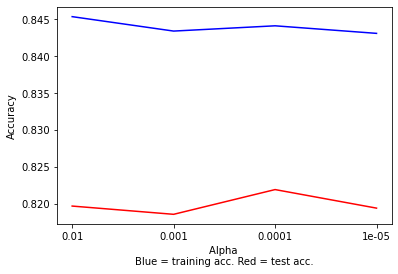

In [63]:
index_ = list(dd.index[(dd['hidden_layer_sizes']==(8,))])
alpha_train = []
alpha_test  = []
for i in range(len(index_)):
    alpha_train.append(train_result[index_[i]])
    alpha_test.append(test_result[index_[i]])
    
plt.plot(range(1, len(alpha_train)+1), alpha_train, 'b', range(1,len(alpha_test)+1), alpha_test, 'r')
plt.xlabel('Alpha \nBlue = training acc. Red = test acc.')
plt.xticks(range(1, 5), [0.01, 0.001, 0.0001, 0.00001])
plt.ylabel('Accuracy')
plt.show()

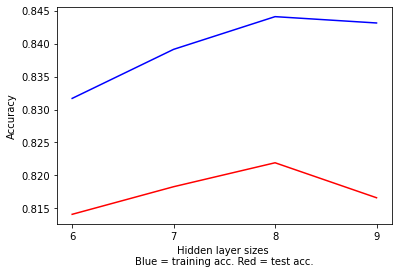

In [64]:
index_ = list(dd.index[(dd['alpha']==0.00010)])
hidden_train = []
hidden_test  = []
for i in range(len(index_)):
    hidden_train.append(train_result[index_[i]])
    hidden_test.append(test_result[index_[i]])
plt.plot(range(1, len(hidden_train)+1), hidden_train, 'b', range(1,len(hidden_test)+1), hidden_test, 'r')
plt.xlabel('Hidden layer sizes \nBlue = training acc. Red = test acc.')
plt.xticks(range(1, 5), [6, 7, 8, 9])
plt.ylabel('Accuracy')
plt.show()

### 4. Produce the ROC curve for all different NNs. Now, using the best neural network model.

In [65]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_df = model_nn_df.predict_proba(X_test)
y_pred_proba_nn_cv = model_nn_cv.predict_proba(X_test)
y_pred_proba_nn_sel_cv = model_nn_sel_cv.predict_proba(X_test_sel_model)


roc_index_nn_df = roc_auc_score(y_test, y_pred_proba_nn_df[:, 1])
roc_index_nn_cv = roc_auc_score(y_test, y_pred_proba_nn_cv[:, 1])
roc_index_nn_sel_cv = roc_auc_score(y_test, y_pred_proba_nn_sel_cv[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_df)
print("ROC index on test for NN with gridsearch:", roc_index_nn_cv)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_nn_sel_cv)

from sklearn.metrics import roc_curve

fpr_nn_df, tpr_nn_df, thresholds_nn_df = roc_curve(y_test, y_pred_proba_nn_df[:,1])
fpr_nn_cv, tpr_nn_cv, thresholds_nn_cv = roc_curve(y_test, y_pred_proba_nn_cv[:,1])
fpr_nn_sel_cv, tpr_nn_sel_cv, thresholds_nn_sel_cv = roc_curve(y_test, y_pred_proba_nn_sel_cv[:,1])

ROC index on test for NN_default: 0.8591067558481863
ROC index on test for NN with gridsearch: 0.8612721740102189
ROC index on test for NN with feature selection and gridsearch: 0.879874251859017


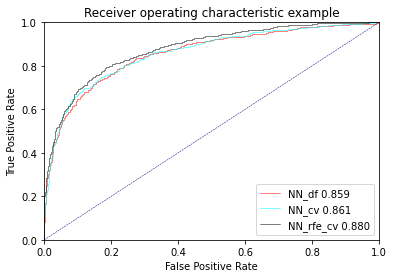

In [66]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_df, tpr_nn_df, label='NN_df {:.3f}'.format(roc_index_nn_df),\
         color='red', lw=0.5)
plt.plot(fpr_nn_cv, tpr_nn_cv, label='NN_cv {:.3f}'.format(roc_index_nn_cv), \
         color='cyan', lw=0.5)
plt.plot(fpr_nn_sel_cv, tpr_nn_sel_cv, label='NN_rfe_cv {:.3f}'\
         .format(roc_index_nn_sel_cv), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Final Remarks

In [69]:
from sklearn.ensemble import VotingClassifier
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt, fpr_dt, tpr_dt = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr, fpr_lr, tpr_lr = pickle.load(f)    

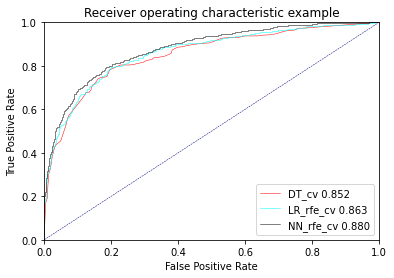

In [70]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='DT_cv {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_lr, tpr_lr, label='LR_rfe_cv {:.3f}'.format(roc_index_lr), color='cyan', lw=0.5)
plt.plot(fpr_nn_sel_cv, tpr_nn_sel_cv, label='NN_rfe_cv {:.3f}'.format(roc_index_nn_sel_cv), color='black', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Ensemble Model

In [71]:
nn_best = model_nn_sel_cv
voting = VotingClassifier(estimators=[('dt', dt_best), ('lr', lr_best), ('nn', nn_best)], voting='soft')

In [73]:
voting.fit(X_train, y_train)
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)
y_pred_em = voting.predict(X_test)
print(classification_report(y_test,y_pred_em,target_names=target_names))

Ensemble train accuracy: 0.8884540117416829
Ensemble test accuracy: 0.817470664928292
ROC score of voting classifier: 0.8863155464932866
                   precision    recall  f1-score   support

Covid-19 Negative       0.83      0.89      0.86       973
Covid-19 Positive       0.79      0.69      0.73       561

         accuracy                           0.82      1534
        macro avg       0.81      0.79      0.80      1534
     weighted avg       0.82      0.82      0.81      1534



C:\Users\n10306986\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
